In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
#Import Basic Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [5]:
#Fetching the data
attr = pd.read_csv('Hotel_Room_attributes.csv',delimiter=',')
details = pd.read_csv('Hotel_details.csv',delimiter=',')
min_max_prices = pd.read_csv('hotel_price_min_max - Formula.csv',delimiter=',')
prices = pd.read_csv('hotels_RoomPrice.csv',delimiter=',')


In [6]:
#Inference: details
"""
id  - primary key
hotelid
hotelname - Name of the hotel
address - main address
city
country
zipcode
propertytype - what kind of place of stay provided
starrating
latitude
longitude
Source - possible that how many people from a Source is coming as guests
url
curr
"""

details.sample(1)

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
94587,140993,1485561,FREIgeist Einbeck,Tiedexer Tor 5,Einbeck,Germany,37574.0,Hotels,4,51.819381,9.861978,2,http://www.booking.com/hotel/de/freigeist-einb...,EUR


In [7]:
details['id'].nunique(), details['hotelid'].nunique()

(108048, 106193)

In [8]:
details.info()
#Around 100000 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108048 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


In [9]:
#Inference: Features: of hotel attributes
"""
id - primary key
hotelcode
roomamenities - features provided with the room
roomtype - level of room booked
ratedescription - it should be  rate and description, messey data
"""

attr.sample(1)

,id,hotelcode,roomamenities,roomtype,ratedescription
46045,70235803,231977,Air conditioning: ;Carpeting: ;Closet: ;Clothe...,Standard Room,"Room size: 21 m²/226 ft², Non-smoking, Shower,..."


In [10]:
attr['id'].nunique(), attr['hotelcode'].nunique()

(165873, 9097)

In [11]:
attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165873 entries, 0 to 165872
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               165873 non-null  int64 
 1   hotelcode        165873 non-null  int64 
 2   roomamenities    161054 non-null  object
 3   roomtype         165873 non-null  object
 4   ratedescription  161054 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.3+ MB


In [12]:
#Inference: Features: of Hotel min,max prices
"""

hotelcode -
min - min price in a specific currency
max - max price in a specific currency
Diff_Min - difference between min price and price offered
Diff_Max - difference between max price and price offered
Score - Overall Score
"""


min_max_prices.sample(1)

,hotelcode,min,max,Diff_Min,Diff_Max,Score
1839,126457,56.98,94.99,0.2,0.372,0.29


In [13]:
min_max_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9094 entries, 0 to 9093
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hotelcode  9094 non-null   int64  
 1   min        9094 non-null   float64
 2   max        9094 non-null   float64
 3   Diff_Min   9094 non-null   float64
 4   Diff_Max   9094 non-null   float64
 5   Score      9094 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 426.4 KB


In [14]:
#Inference: Features: of Hotel prices
"""
id- primary key
refid -  could be hotelid or id from a source the booking was done
hotelcode -
websitecode -
dtcollected - guest's collected received
ratedate - rate decided on which date
Length of Stay (LOS) - The number of nights a guest stays at a hotel.
guests - no of guests in the booked roomed
roomtype - type of room offered
onsiterate - price of rooms
netrate -
currency -
ratedescription - decription of hotel room
ratetype - offers provided on hotel prices
sourceurl -
roomamenities - decription of hotel room
maxoccupancy - how many people can stay
ispromo - is promo code applied
closed -
discount - if discount provided
promoname - promo name is any
status_code - current state of hotel room and guest
taxstatus -
taxtype - type of tax applied
taxamount - tax amount applied
proxyused - proxy id used to book tickets
israteperstay - rate per stay offered or not
mealinclusiontype - types of meals offered
hotelblock -
input_dtcollected - when did guest fill the details









"""


prices.sample(2)

,id,refid,hotelcode,websitecode,dtcollected,ratedate,los,guests,roomtype,onsiterate,netrate,currency,ratedescription,ratetype,sourceurl,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
92382,74248732,7969406,236538,5,2019-10-12 21:39:35,2019-10-16,1,1,Suite,304.87,0.0,USD,Shower,Cancellation policy,https://www.agoda.com/en-gb/hotel-home-moderne...,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,1,N,N,0.0,NaN,200,2,Tax 10%,0.0,media:M3d!a@191.101.110.146:12345,Y,NaN,NaN,2019-10-13
42203,69895060,9370997,154746,5,2019-10-12 20:31:00,2019-11-21,1,1,Junior Suite,89.51,0.0,USD,"Room size: 35 m²/377 ft², Shower, 1 king bed o...",Extra low price! (non-refundable),https://www.agoda.com/en-gb/holiday-inn-expres...,Air conditioning: ;Alarm clock: ;Closet: ;Clot...,2,N,N,0.0,NaN,200,2,VAT $ 8.95,0.0,media:M3diAproxy@191.96.242.115:80,Y,Free breakfast for {2},NaN,2019-10-13


In [15]:
prices['id'].nunique(), prices['refid'].nunique(), prices['hotelcode'].nunique()

(165873, 11922, 9097)

In [16]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165873 entries, 0 to 165872
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 165873 non-null  int64  
 1   refid              165873 non-null  int64  
 2   hotelcode          165873 non-null  int64  
 3   websitecode        165873 non-null  int64  
 4   dtcollected        165873 non-null  object 
 5   ratedate           165873 non-null  object 
 6   los                165873 non-null  int64  
 7   guests             165873 non-null  int64  
 8   roomtype           165873 non-null  object 
 9   onsiterate         165873 non-null  float64
 10  netrate            165873 non-null  float64
 11  currency           165873 non-null  object 
 12  ratedescription    161054 non-null  object 
 13  ratetype           161054 non-null  object 
 14  sourceurl          165873 non-null  object 
 15  roomamenities      161054 non-null  object 
 16  ma

In [17]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108048 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


EDA for Details DataFrame

<Axes: >

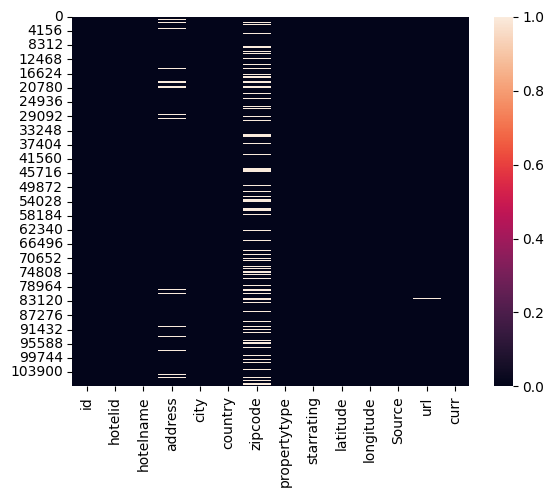

In [18]:
sns.heatmap(details.isna())

In [19]:
details['zipcode'].isna().mean()*100, details['address'].isna().mean()*100

(22.7324892640308, 4.7136457870576045)

Conclusion: Zipcode has 22% of its data missing

In [20]:
#Column Types
"""
Numerical - Age,Fare,PassengerId
Categorical - Survived, Pclass, Sex, SibSp, Parch,Embarked
Mixed - Name, Ticket, Cabin
"""

#Starting with Univariate Analysis


'\nNumerical - Age,Fare,PassengerId\nCategorical - Survived, Pclass, Sex, SibSp, Parch,Embarked\nMixed - Name, Ticket, Cabin\n'

Conclusion: ID feature is unique and will be used to connect other dataframes

In [21]:
details['id'].nunique() == len(details)

True

Conclusion: hotelid feature may have repeating hotel ids, later we will decide whether to drop it or not

In [22]:
details['hotelid'].nunique(), len(details)

(106193, 108048)

Conclusion: hotelname and address features are a series of mostly unique values

In [23]:
details['hotelname'].nunique(), details['address'].nunique()

(96203, 96978)

In [24]:
details['city'].nunique(), details['city'].isna().sum()

(25693, 0)

Conclusion: Major European City are present with NO null values

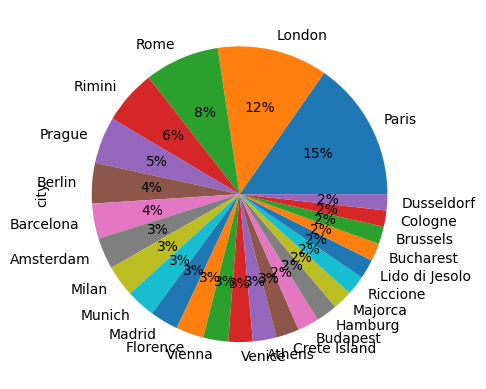

In [25]:
sns.color_palette('bright')
details['city'].value_counts().head(25).plot(kind='pie',autopct='%.0f%%')
plt.show()

In [26]:
countries = details['country'].value_counts().index.to_list()

In [27]:
details['country'].isna().sum()

0

Conclusion: Only few famous Country are getting many booking, no Null values found

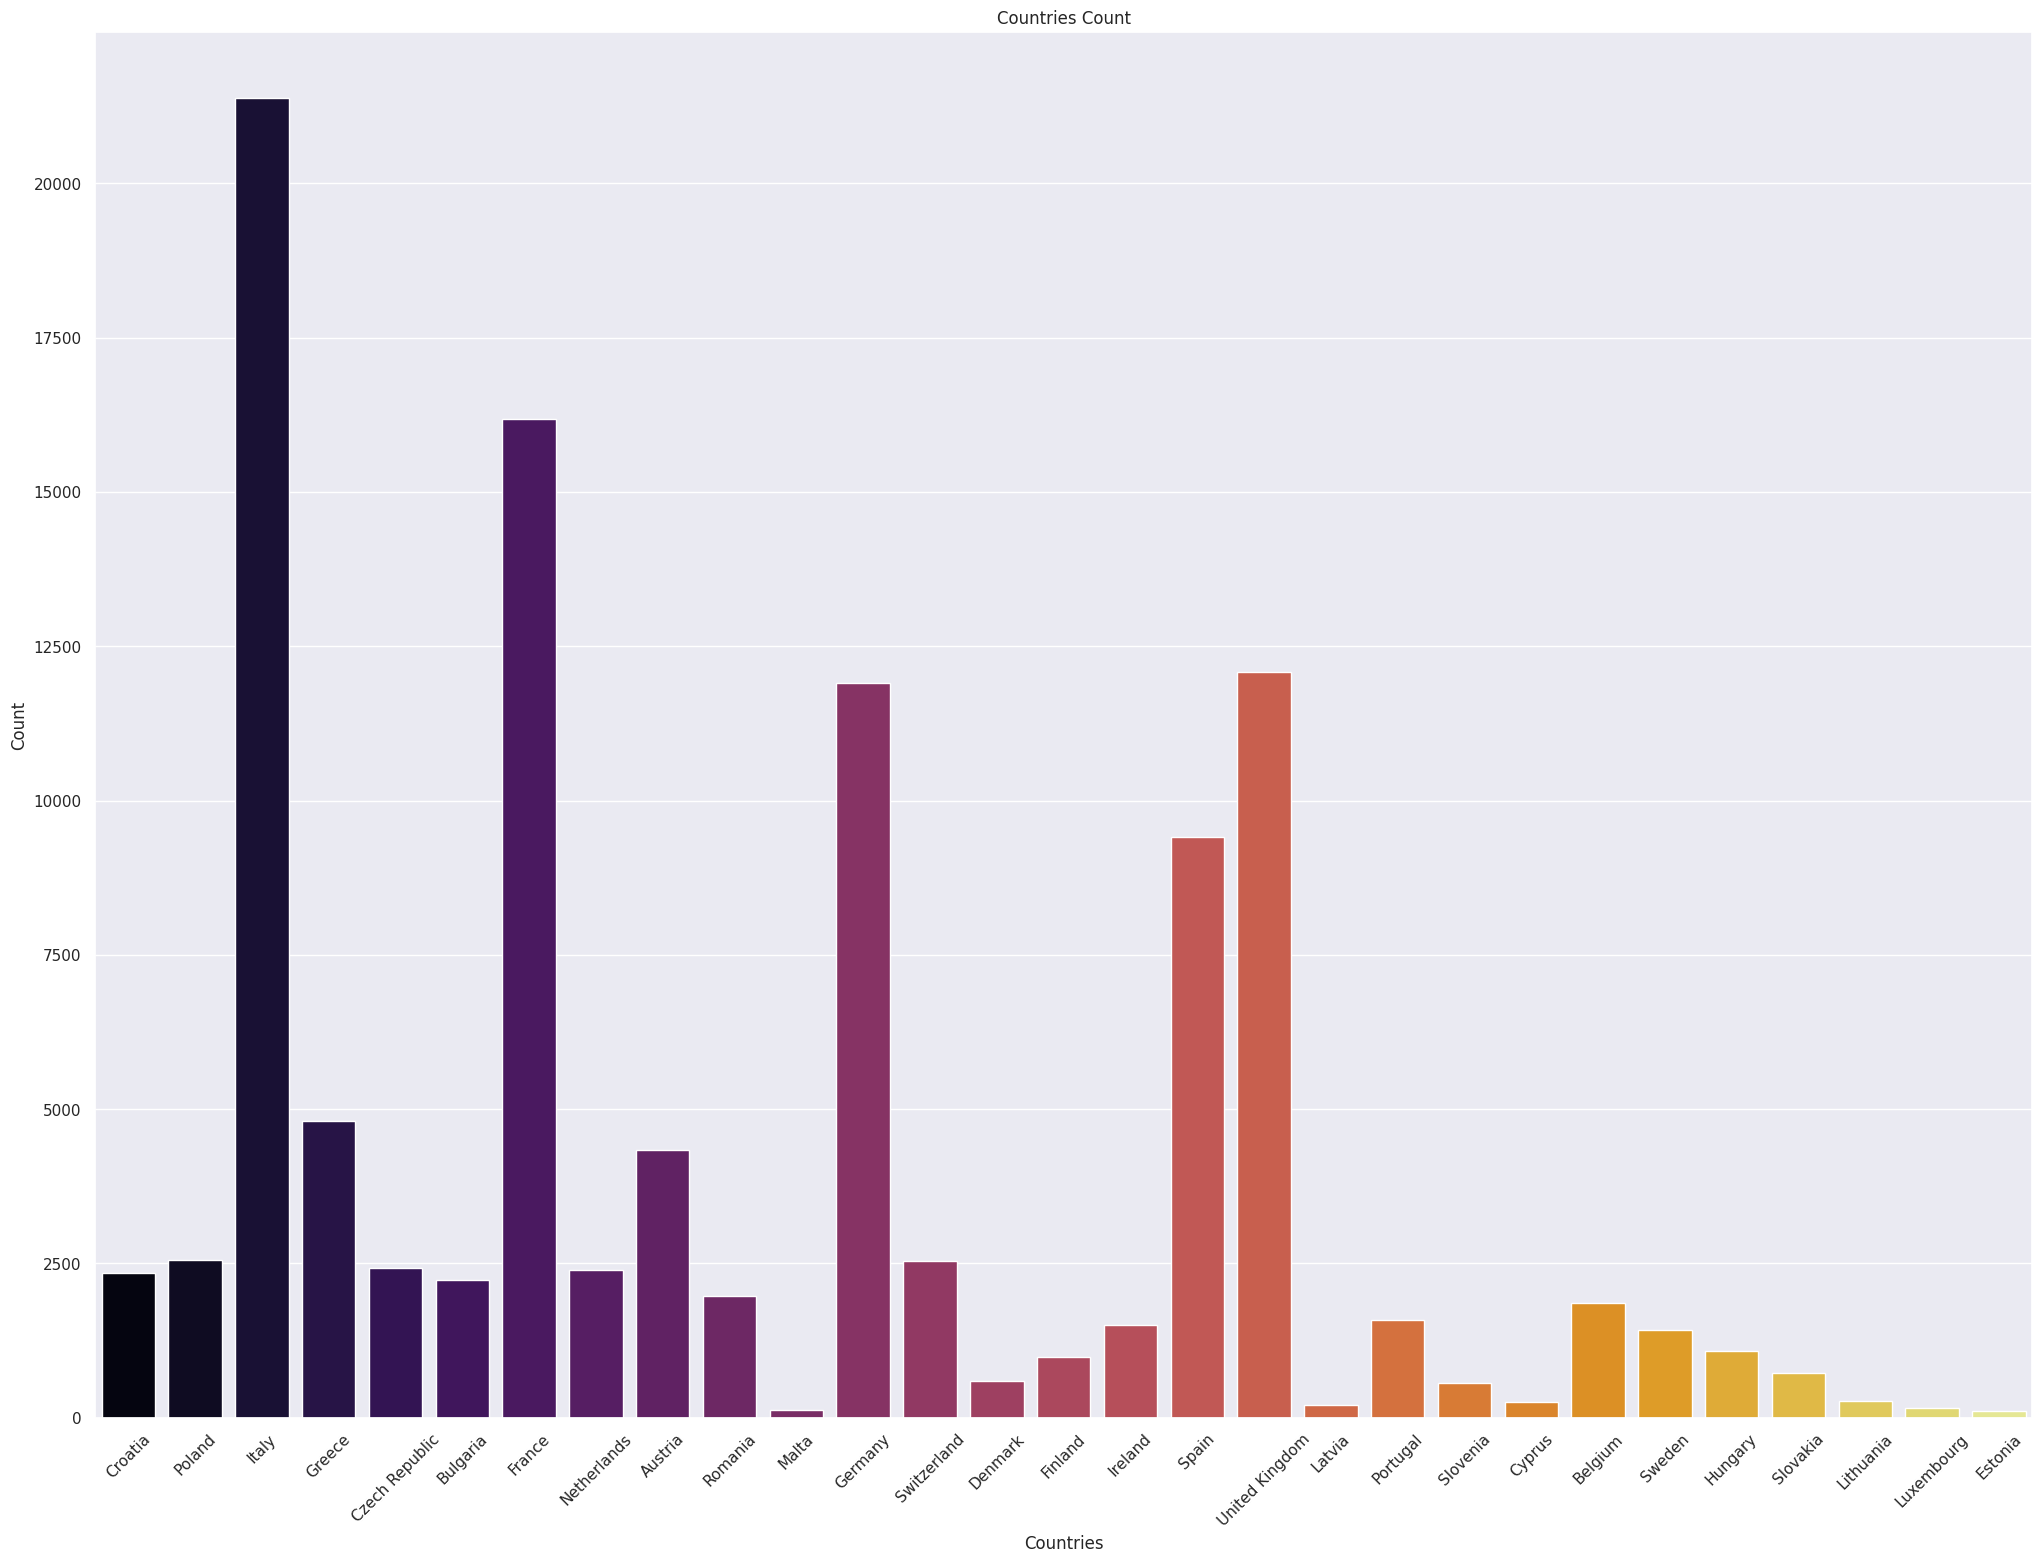

In [28]:
sns.set(rc={'figure.figsize':(25,18)})
chart = sns.countplot(x ='country',data=details,palette='inferno',hue_order=countries)
plt.xlabel("Countries")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.ylabel("Count")
plt.title("Countries Count")
plt.show()



In [29]:
details['propertytype'].value_counts()

Hotels                102417
Bed and breakfasts      2239
Resorts                 1209
Campsites                821
Holiday parks            696
Inns                     411
Motels                   254
Health resorts             1
Name: propertytype, dtype: int64

Conclusion: Hotels are dominating, we can think of dropping the remaining values if needed

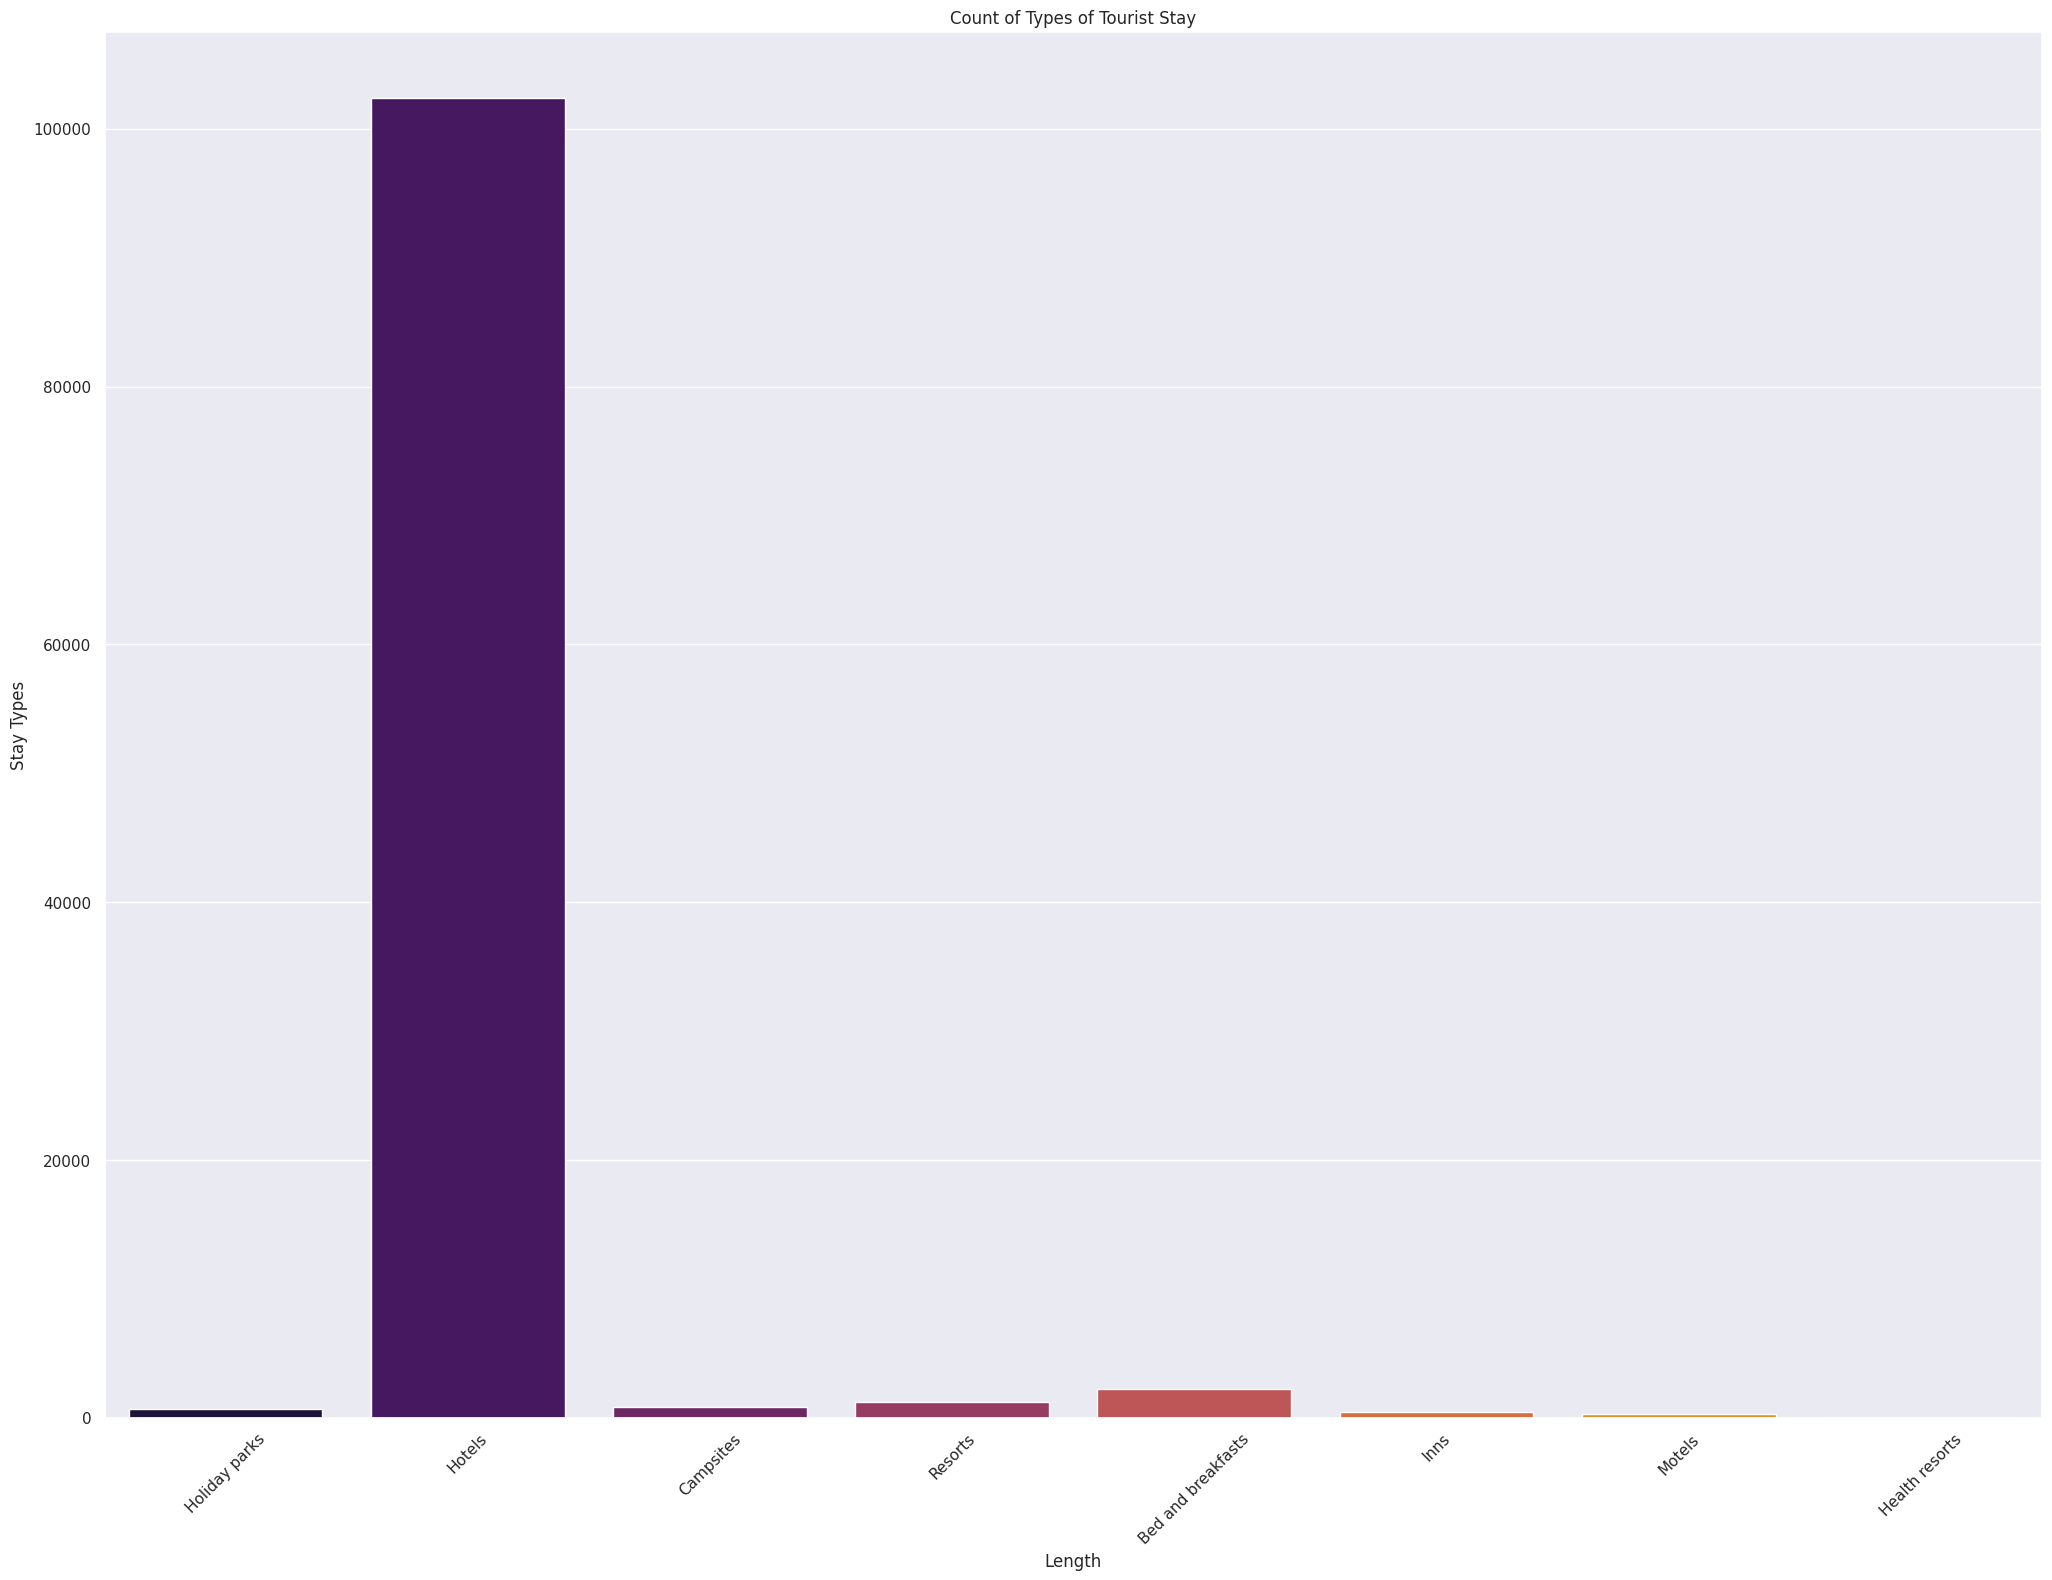

In [30]:
sns.set(rc={'figure.figsize':(25,18)})
chart = sns.countplot(x ='propertytype',data=details,palette='inferno')
plt.xlabel("Length")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.ylabel("Stay Types")
plt.title("Count of Types of Tourist Stay")
plt.show()



In [31]:
details['starrating'].value_counts()

3    56419
4    35892
2    15737
Name: starrating, dtype: int64

Conclusion: Half of the tourist stay places have got an average rating ie 3.

In [32]:
details['starrating'].isna().sum()

0

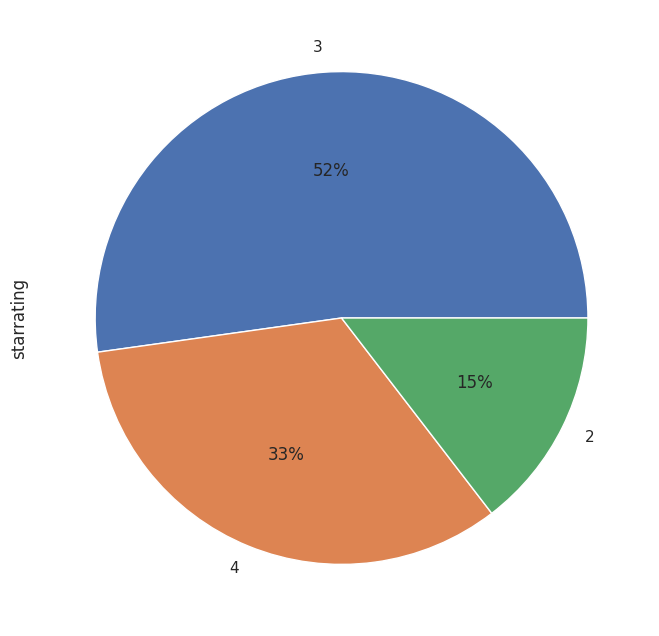

In [33]:
plt.figure(figsize=(15,8))
sns.color_palette('bright')
details['starrating'].value_counts().plot(kind='pie',autopct='%.0f%%')
plt.show()

In [34]:
details['curr'].value_counts()

EUR    86483
GBP    12085
CHF     2546
PLN     1967
BGN     1553
SEK     1419
RON     1403
DKK      592
Name: curr, dtype: int64

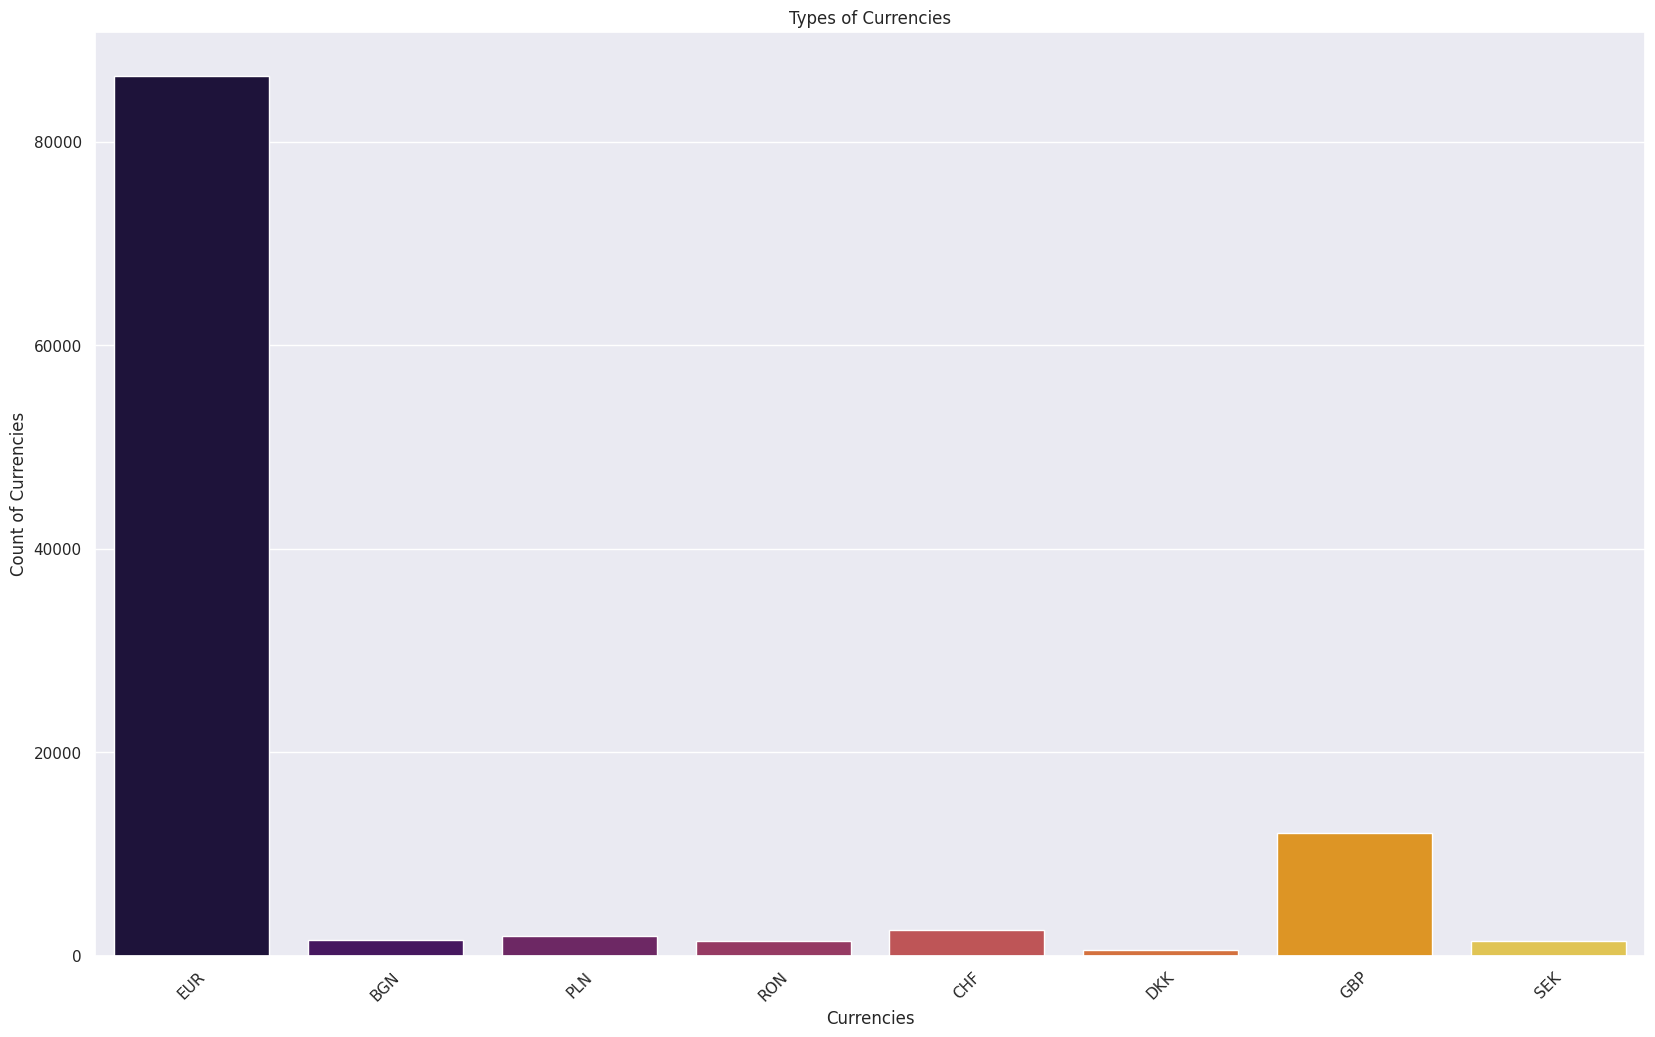

In [35]:
sns.set(rc={'figure.figsize':(20,12)})
chart = sns.countplot(x ='curr',data=details,palette='inferno')
plt.xlabel("Currencies")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.ylabel("Count of Currencies")
plt.title("Types of Currencies")
plt.show()

In [36]:
details.head(2)

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR


In [37]:
details['Source'].value_counts()

2    68882
5    39166
Name: Source, dtype: int64

Univariate Analysis Over. No Numerical values present

Bivaraite Analysis


In [38]:
details.head(2)

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR


<ipython-input-39-0d12f52487f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(details.corr(),annot=True)


<Axes: >

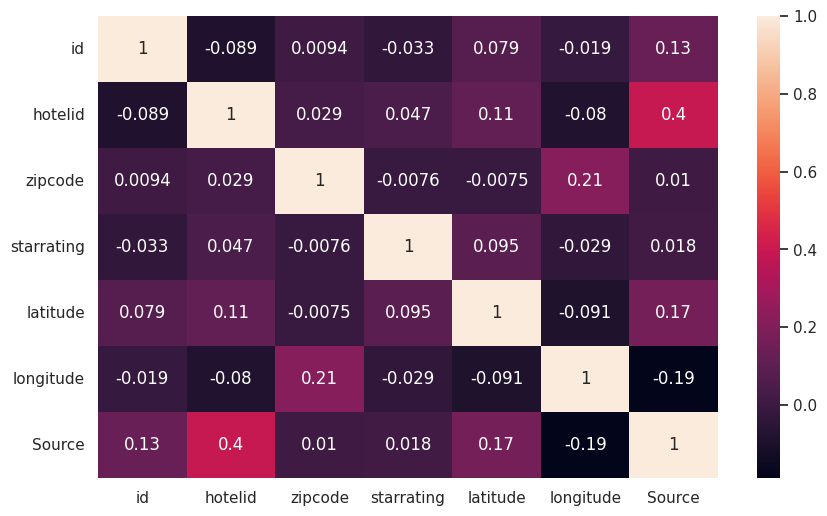

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(details.corr(),annot=True)

In [40]:
details.head(2)

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR


In [41]:
attr.head()

,id,hotelcode,roomamenities,roomtype,ratedescription
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed"
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"


Conclusion: Wherever roomamenities are missing, ratedescription is also missing in parallel, Missing Not at Random

<Axes: >

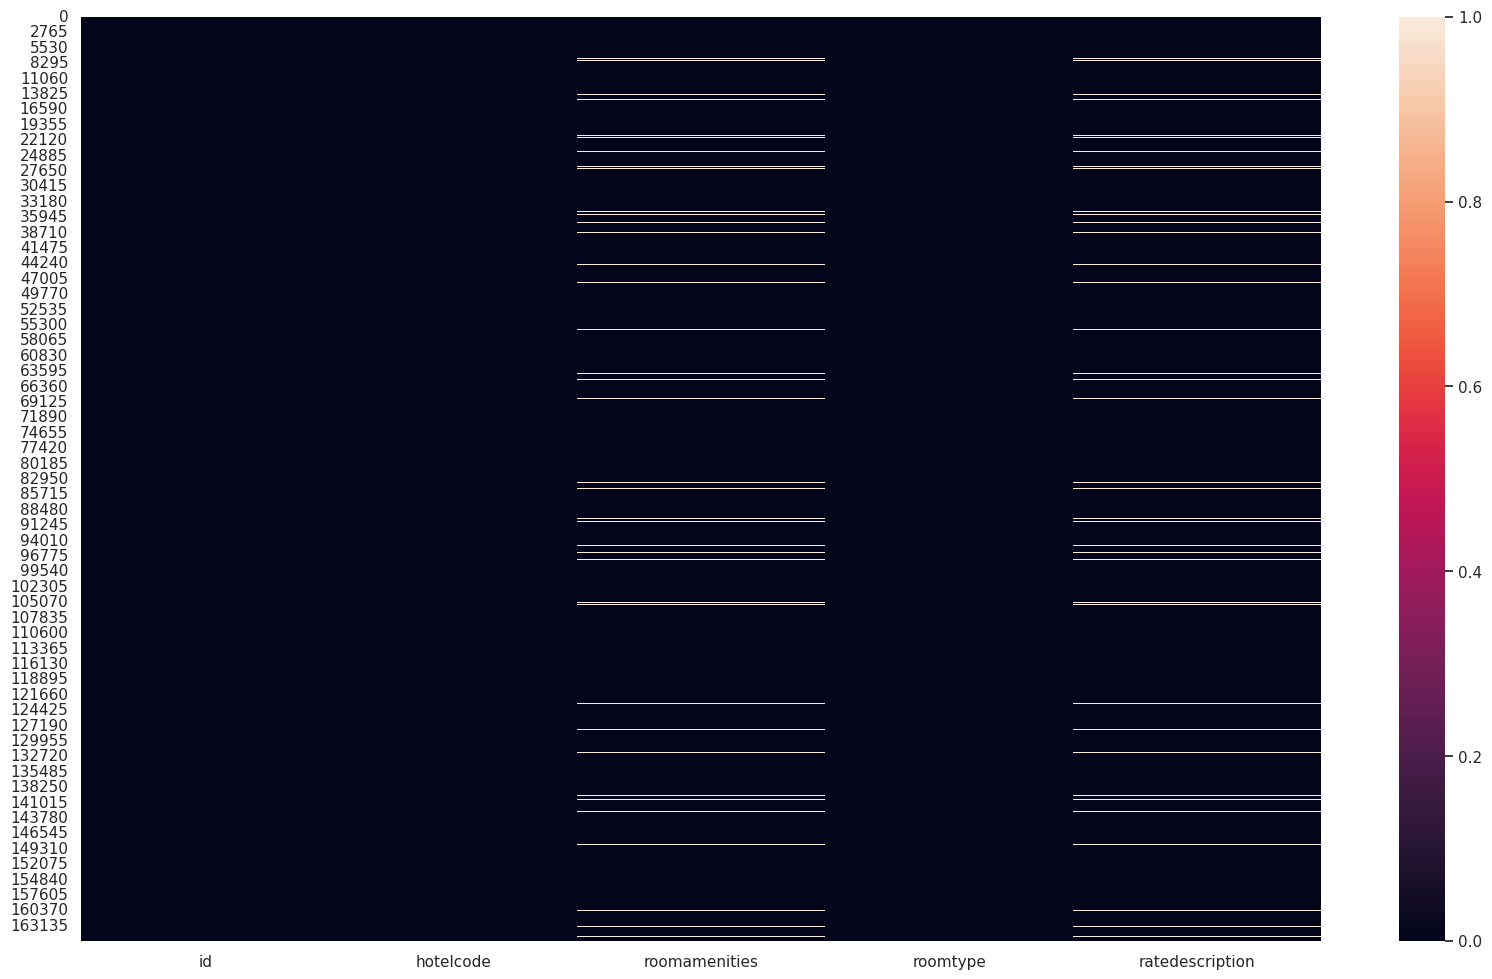

In [42]:
sns.heatmap(attr.isna())

Conclusion: Attr id feature can be used as primary key having no Null values

In [43]:
attr['id'].value_counts().sum(),attr['id'].nunique(), attr['id'].isna().sum()

(165873, 165873, 0)

Conclusion: hotelcode is not unique with no null values

In [44]:
attr['hotelcode'].value_counts().sum(),attr['hotelcode'].nunique(),attr['hotelcode'].isna().sum()

(165873, 9097, 0)

Conclusion: roomamenities are room assessories and services provided, it can be merged into few categories later
    Categories could include Comfortable Air Ventilation, Proper HouseKeeping, Daily Accessories for Free, etc

In [45]:
attr['roomamenities'][10]

'Air conditioning: ;Closet: ;Daily housekeeping: ;Desk: ;Fan: ;Free Wi-Fi in all rooms!: ;Hair dryer: ;Heating: ;In-room safe box: ;Linens: ;Mini bar: ;On-demand movies: ;Satellite/cable channels: ;Telephone: ;Toiletries: ;Towels: ;Wake-up service: ;Wooden/parqueted flooring: ;'

Conclusion: roomtypes are repeated many times. It can be merged into few categories

In [46]:
attr['roomtype'].nunique()

9121

In [47]:
rooms = attr['roomtype'].value_counts().head(30)#.index.to_list()
rooms

Double Room                     8227
Twin Room                       4459
Single Room                     4260
Standard Double Room            4151
Triple Room                     3705
Superior Double Room            3569
Family Room                     3053
Junior Suite                    2579
Standard Twin Room              2396
Double or Twin Room             2207
Suite                           2147
Deluxe Double Room              1747
Standard Room                   1507
Superior Room                   1488
Standard Single Room            1375
Single                          1282
Quadruple Room                  1223
Executive Double Room           1192
Standard                        1158
Double                          1044
Superior Twin Room               970
Classic Double Room              904
Triple                           876
Standard Double                  860
Run of House                     835
Comfort Double Room              812
Deluxe Room                      728
D

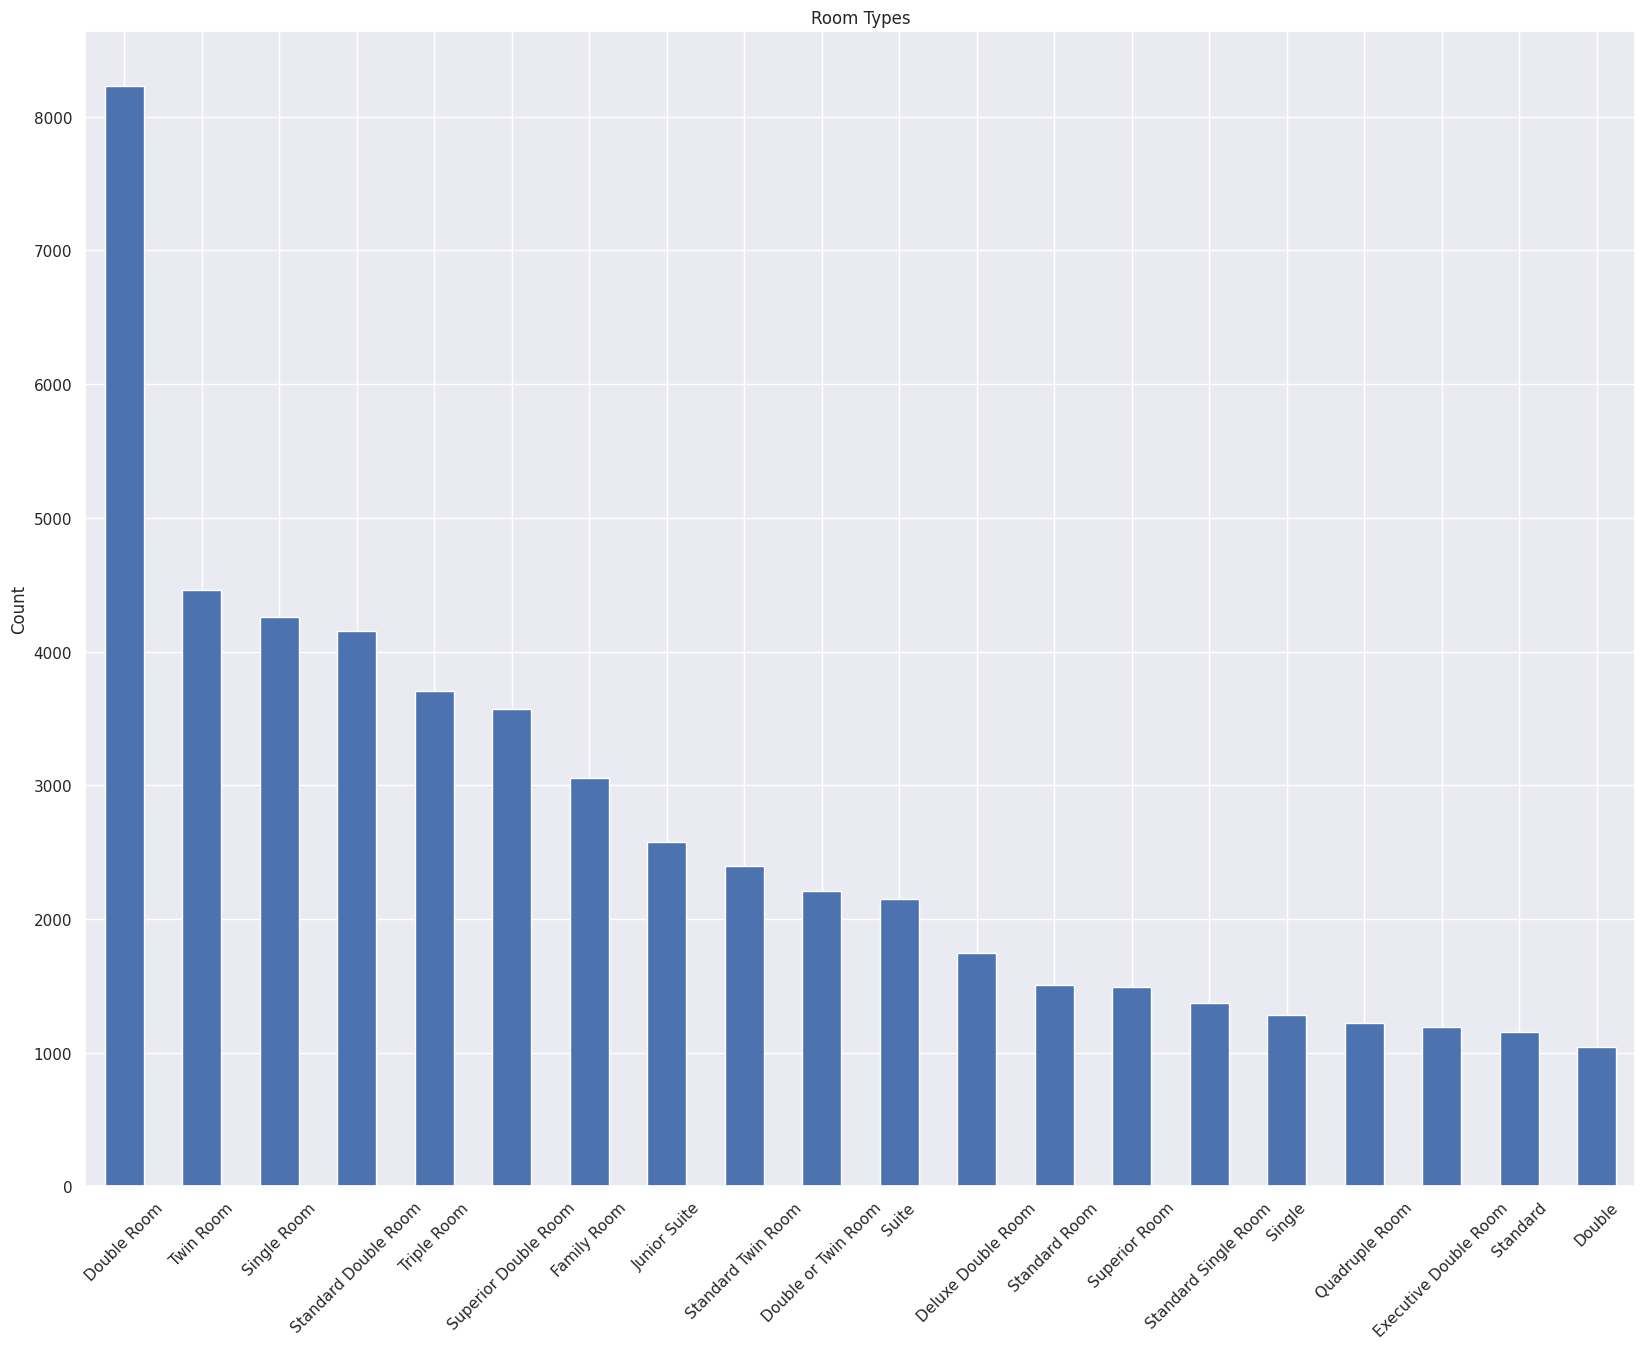

In [48]:
plt.figure(figsize=(20,15))
attr['roomtype'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Room Types')
plt.ylabel('Count')
plt.show()

Conclusion: ratedescription are unique values changing based on every hotel and every room available, can merge into different categories

In [49]:
attr['ratedescription'][0]

'Room size: 15 m²/161 ft², Shower, 1 king bed'

In [50]:
#EDA for min_max_prices

min_max_prices.head()

,hotelcode,min,max,Diff_Min,Diff_Max,Score
0,31,75.10,189.88,0.000,0.000,0.00
1,97,259.76,400.00,1.103,0.712,0.91
2,834,220.67,656.86,0.786,1.124,0.95
3,3144,254.54,347.30,0.886,0.395,0.64
4,11203,230.91,244.58,0.748,0.149,0.45


<Axes: >

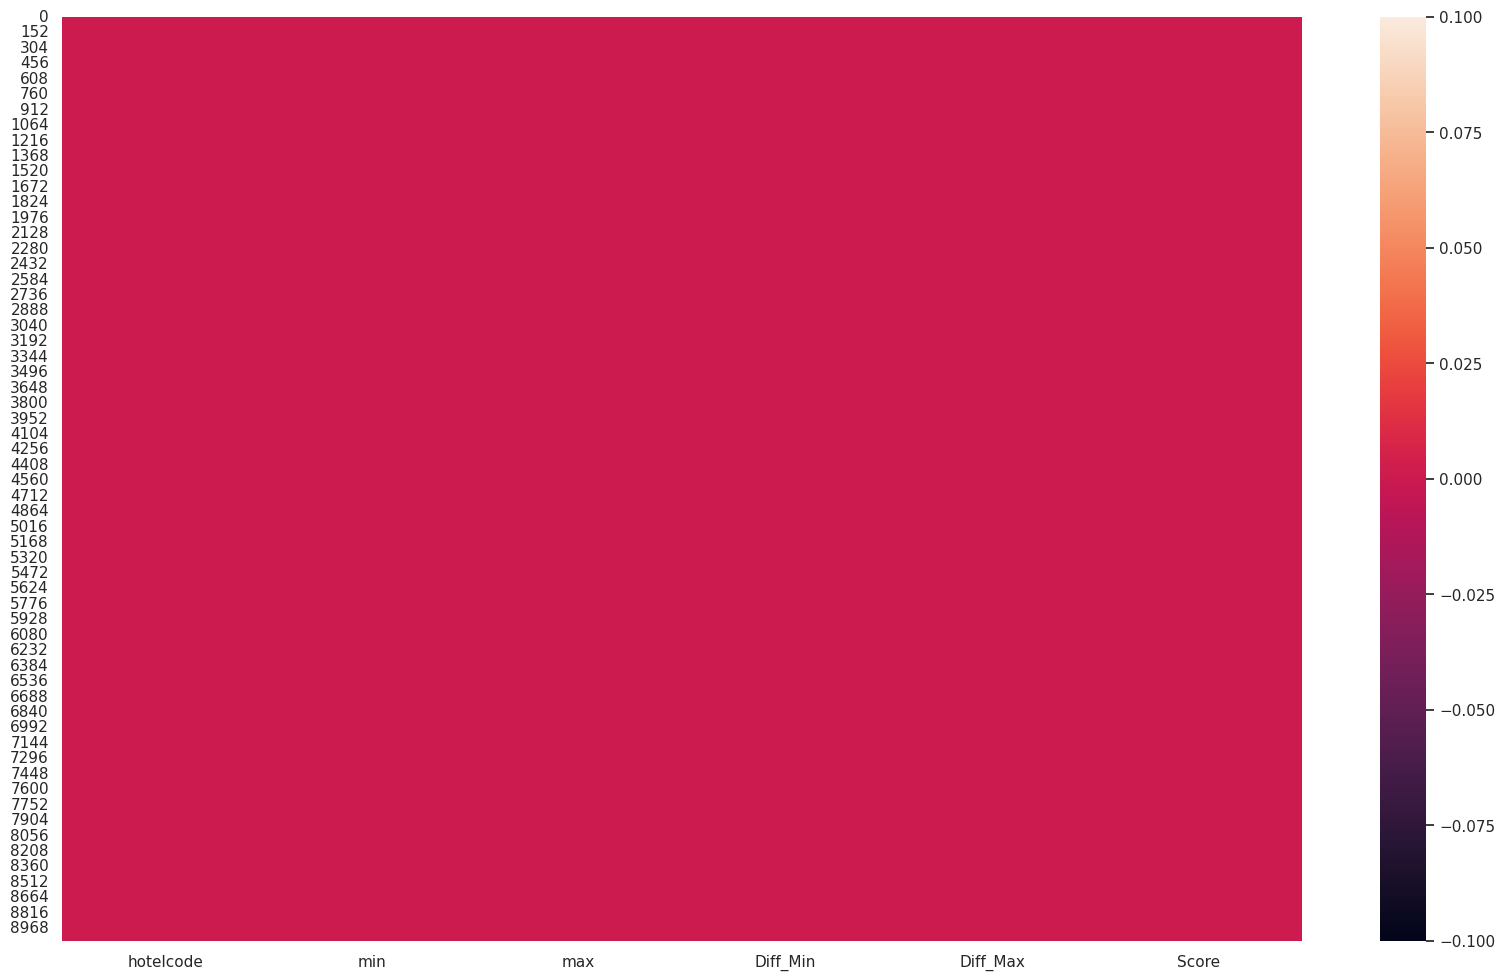

In [51]:
sns.heatmap(min_max_prices.isna())

Conclusion: No Null values present

In [52]:
min_max_prices.isna().sum()

hotelcode    0
min          0
max          0
Diff_Min     0
Diff_Max     0
Score        0
dtype: int64

In [53]:
min_max_prices['hotelcode'].nunique()

9093

In [54]:
min_max_prices['min']

0        75.10
1       259.76
2       220.67
3       254.54
4       230.91
         ...  
9089     79.37
9090    176.03
9091     50.23
9092    100.32
9093     44.20
Name: min, Length: 9094, dtype: float64

In [55]:
len(min_max_prices)

9094

Conclusion: min_max_prices has lowest records with no null values

In [56]:
min_max_prices['Score']

0       0.00
1       0.91
2       0.95
3       0.64
4       0.45
        ... 
9089    0.22
9090    0.51
9091    0.43
9092    0.34
9093    0.42
Name: Score, Length: 9094, dtype: float64

Text(0.5, 1.0, 'Min Values Boxplot')

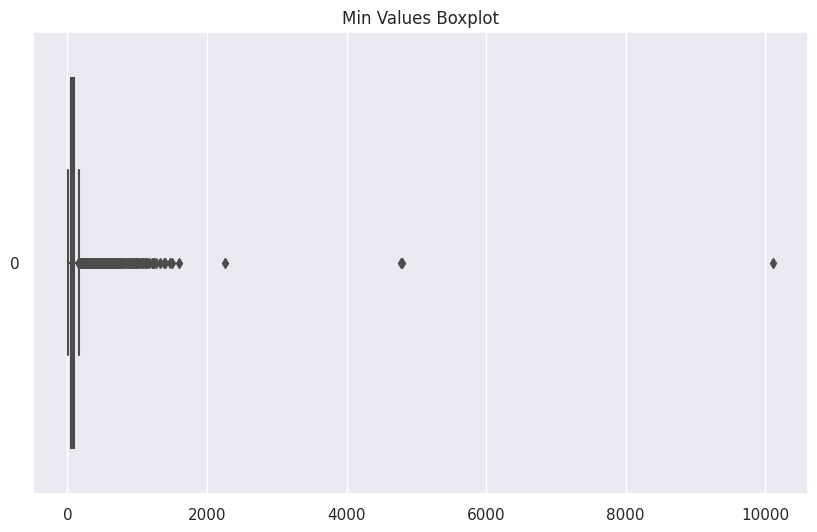

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(min_max_prices['min'],orient='h')
plt.title('Min Values Boxplot')

Text(0.5, 1.0, 'Max Values Boxplot')

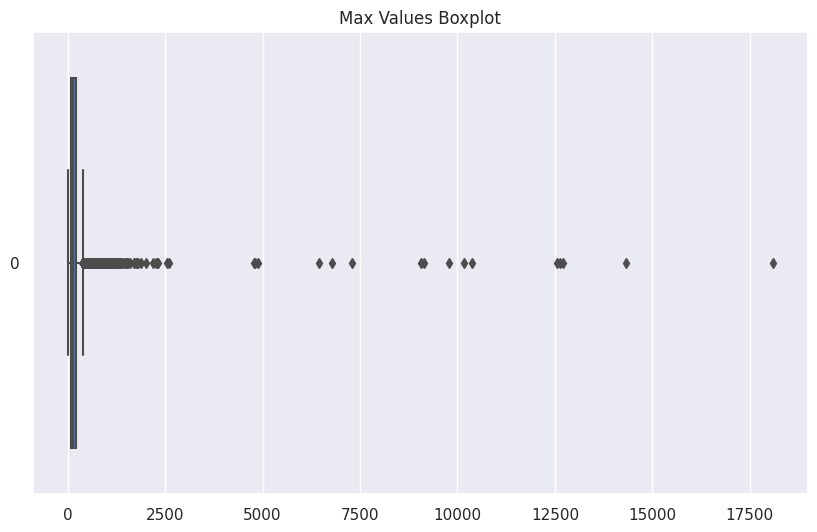

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(min_max_prices['max'],orient='h')
plt.title('Max Values Boxplot')

In [59]:
min_max_prices['max'].mean() - min_max_prices['min'].mean()

100.10318671651638

In [60]:
min_max_prices['max'].min() - min_max_prices['min'].min() , min_max_prices['max'].max() - min_max_prices['min'].max()

(1.6400000000000006, 7979.310000000001)

In [61]:
min_max_prices['max'].max() - min_max_prices['min'].min(), min_max_prices['min'].max() - min_max_prices['max'].min()

(18073.2, 10092.25)

In [62]:
min_max_prices['Score'].mean()

0.5697009016934244

In [63]:
#EDA for Prices Feature

#Univariate
prices.head()

,id,refid,hotelcode,websitecode,dtcollected,ratedate,los,guests,roomtype,onsiterate,netrate,currency,ratedescription,ratetype,sourceurl,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,8646773,634876,5,2019-10-12 15:46:54,2019-11-02,1,1,Double Room,82.36,87.84,USD,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,https://www.agoda.com/en-gb/the-old-cider-hous...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,6.24,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.165.126:80,Y,Free Breakfast,NaN,2019-10-13
1,50672149,6234691,8328096,5,2019-10-12 15:47:45,2019-11-30,1,1,Vacation Home,636.09,0.00,USD,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,https://www.agoda.com/en-gb/pantlleni/hotel/be...,Air conditioning: ;Closet: ;Fireplace: ;Free W...,4,N,N,0.00,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.164.126:80,Y,NaN,NaN,2019-10-13
2,50643430,7015677,8323442,5,2019-10-12 15:47:00,2019-12-20,1,1,Vacation Home,591.74,0.00,USD,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),https://www.agoda.com/en-gb/willow-cottage/hot...,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,4,N,N,0.00,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.166.122:80,Y,NaN,NaN,2019-10-13
3,50650317,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,881.48,0.00,USD,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),https://www.agoda.com/en-gb/apollo-hotel-londo...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,1,N,N,0.00,NaN,200,2,Tax 20%,0.0,media:M3diAproxy@209.242.219.141:80,Y,NaN,NaN,2019-10-13
4,50650318,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,897.53,0.00,USD,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),https://www.agoda.com/en-gb/apollo-hotel-londo...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,3,N,N,0.00,NaN,200,2,VAT $ 179.51,0.0,media:M3diAproxy@209.242.219.141:80,Y,Free breakfast for {3},NaN,2019-10-13


Conclusion: id feature represents unique values

In [64]:
prices['id'].value_counts().sum(), len(prices)

(165873, 165873)

Conclusion: websitecode will be dropped as only single value of 5 present

In [65]:
prices['websitecode'].value_counts()

5    165873
Name: websitecode, dtype: int64

Conclusion: All Date features are object types, need to convert into datetime

In [66]:
prices['dtcollected'].dtypes , prices['ratedate'].dtypes , prices['input_dtcollected'].dtypes

(dtype('O'), dtype('O'), dtype('O'))

In [67]:
prices['dtcollected'] = prices['dtcollected'].astype('datetime64[ns]')
prices['ratedate'] = prices['ratedate'].astype('datetime64[ns]')
prices['input_dtcollected'] = prices['input_dtcollected'].astype('datetime64[ns]')


In [68]:
prices['dtcollected'].dtypes , prices['ratedate'].dtypes , prices['input_dtcollected'].dtypes

(dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<M8[ns]'))

Conclusion: los can be dropped as just a single value of 1 present

In [69]:
prices['los'].value_counts()

1    165873
Name: los, dtype: int64

Conclusion: guests can be dropped as just a single value of 1 present

In [70]:
prices['guests'].value_counts()

1    165873
Name: guests, dtype: int64

Conclusion: roomtype have many repeating or similar values which can be merged later

In [71]:
prices['roomtype'].value_counts().head(20)

Double Room              8227
Twin Room                4459
Single Room              4260
Standard Double Room     4151
Triple Room              3705
Superior Double Room     3569
Family Room              3053
Junior Suite             2579
Standard Twin Room       2396
Double or Twin Room      2207
Suite                    2147
Deluxe Double Room       1747
Standard Room            1507
Superior Room            1488
Standard Single Room     1375
Single                   1282
Quadruple Room           1223
Executive Double Room    1192
Standard                 1158
Double                   1044
Name: roomtype, dtype: int64

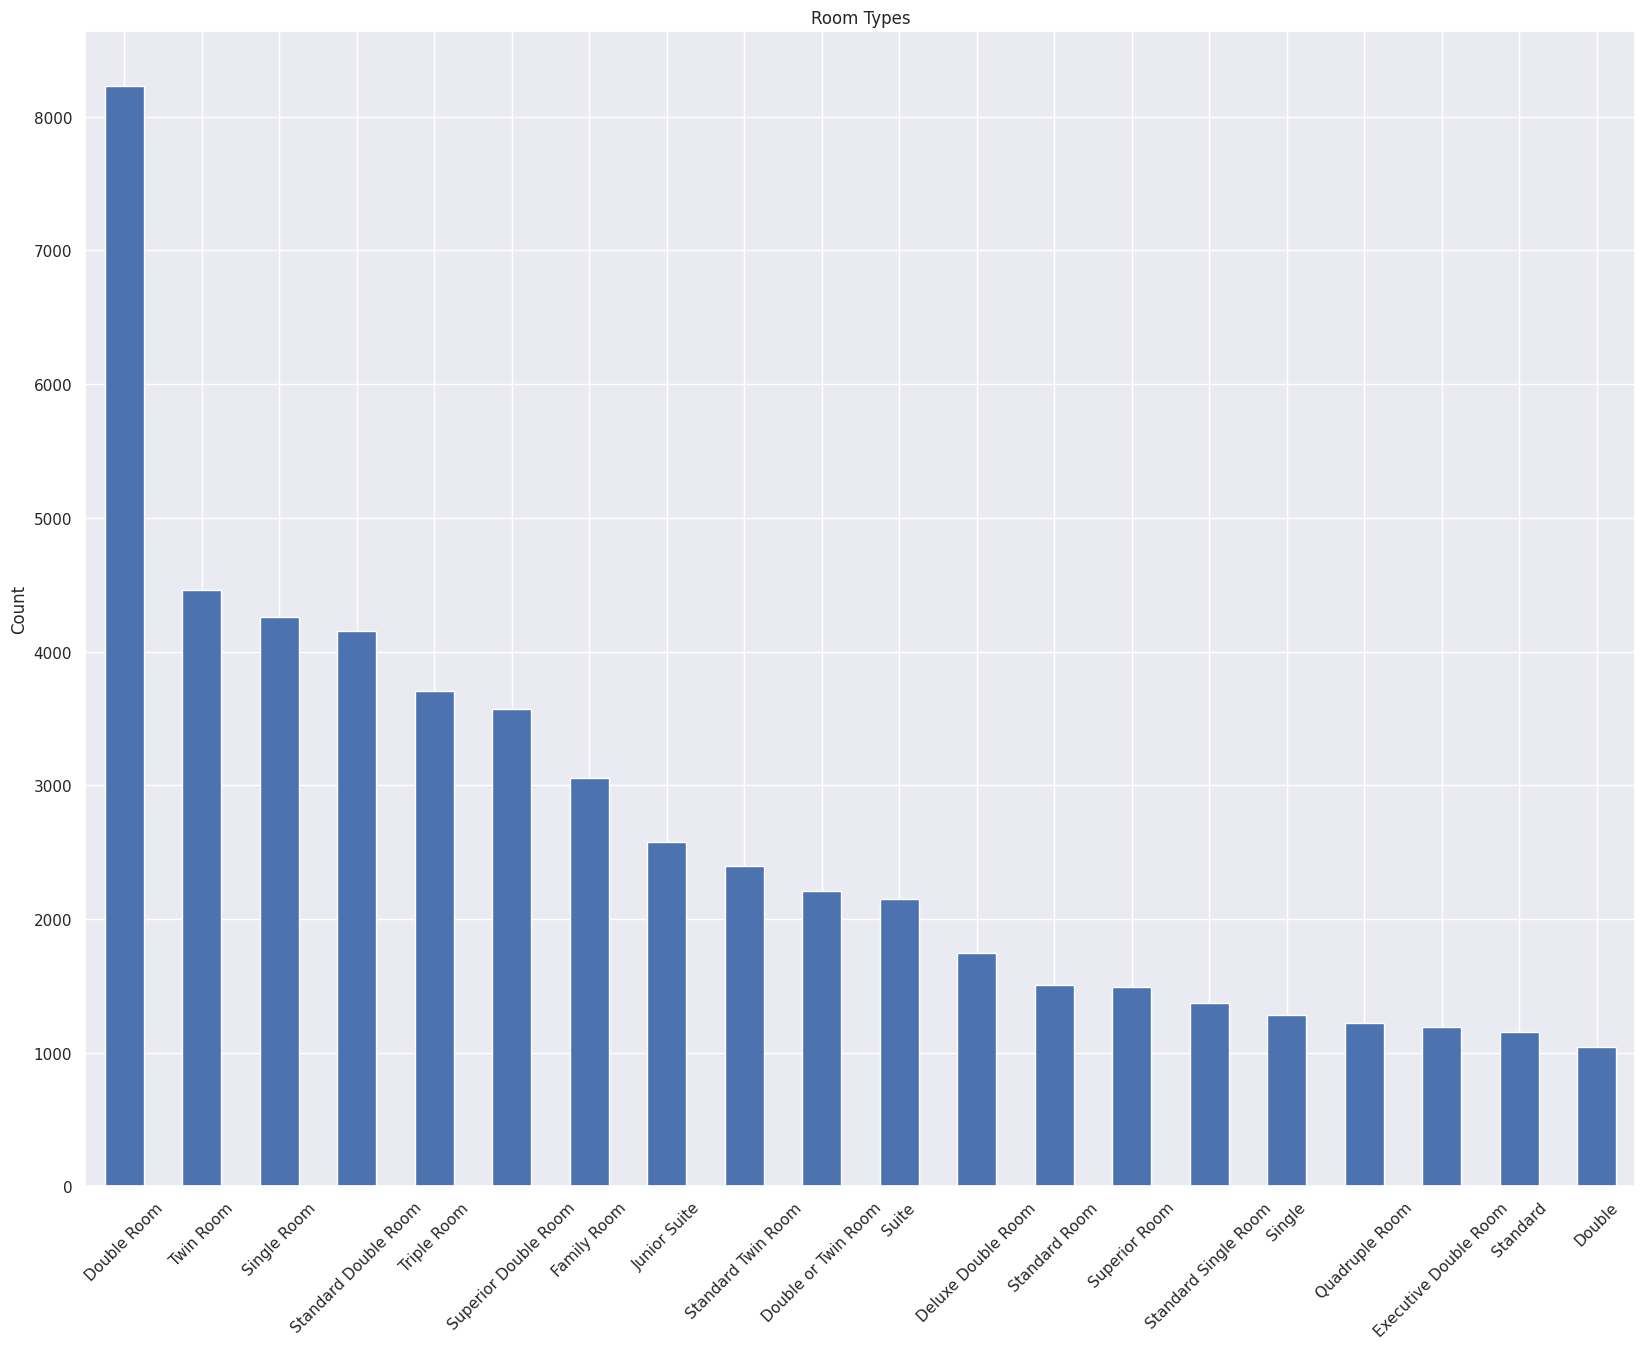

In [72]:
plt.figure(figsize=(20,15))
prices['roomtype'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Room Types')
plt.ylabel('Count')
plt.show()

<Axes: >

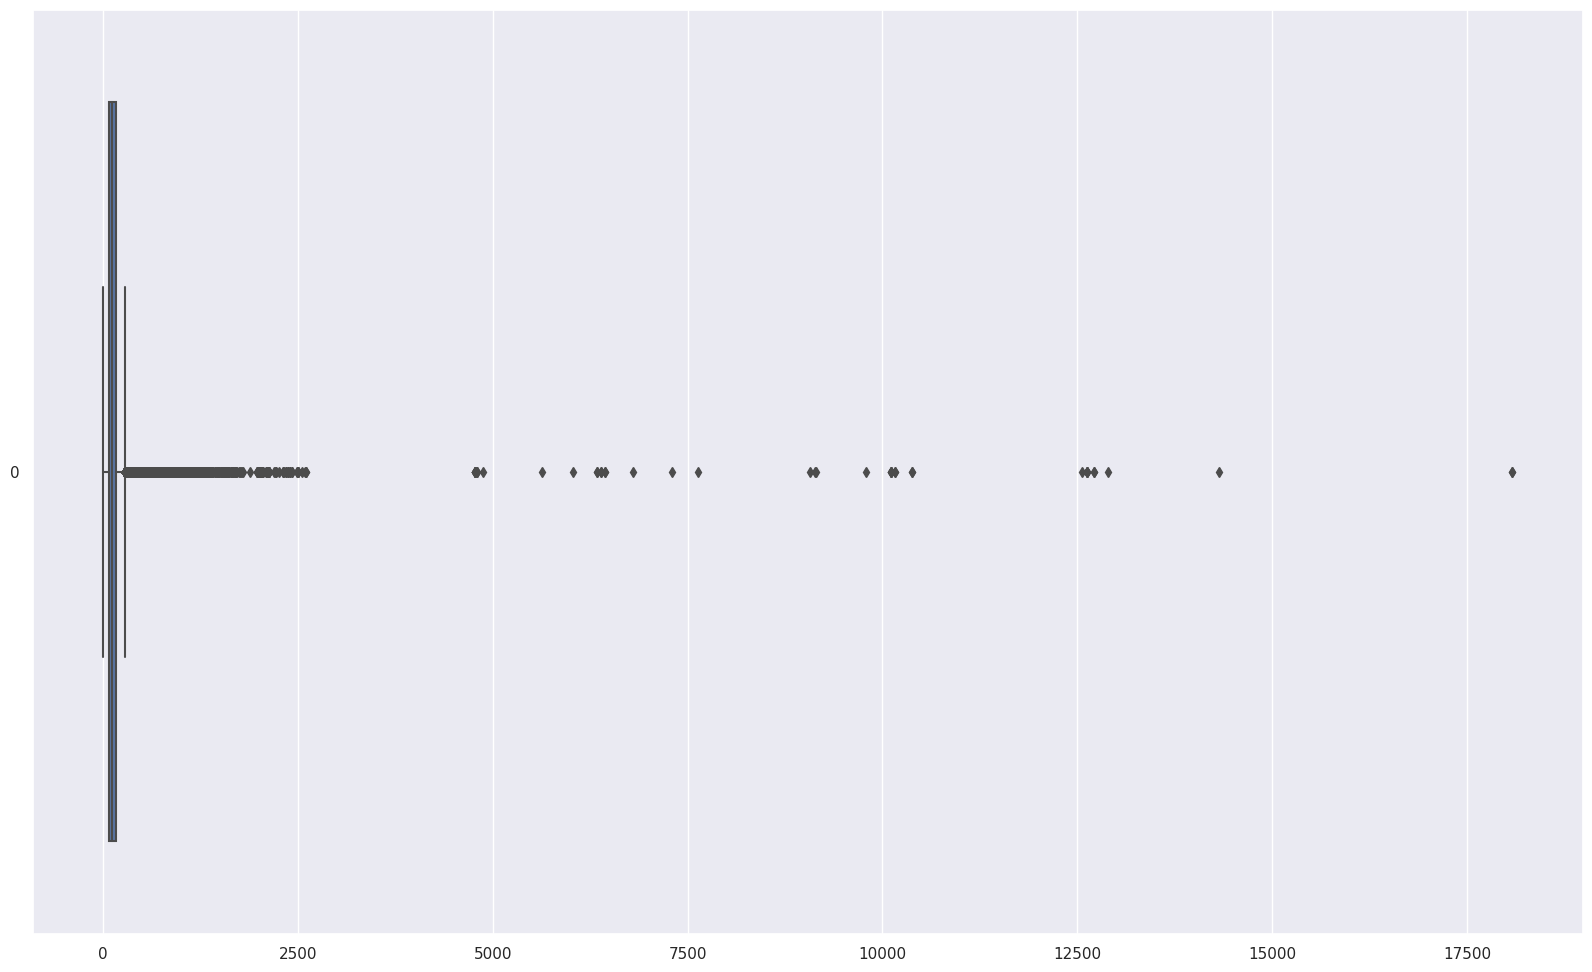

In [73]:
sns.boxplot(prices['onsiterate'],orient='h')

<Axes: >

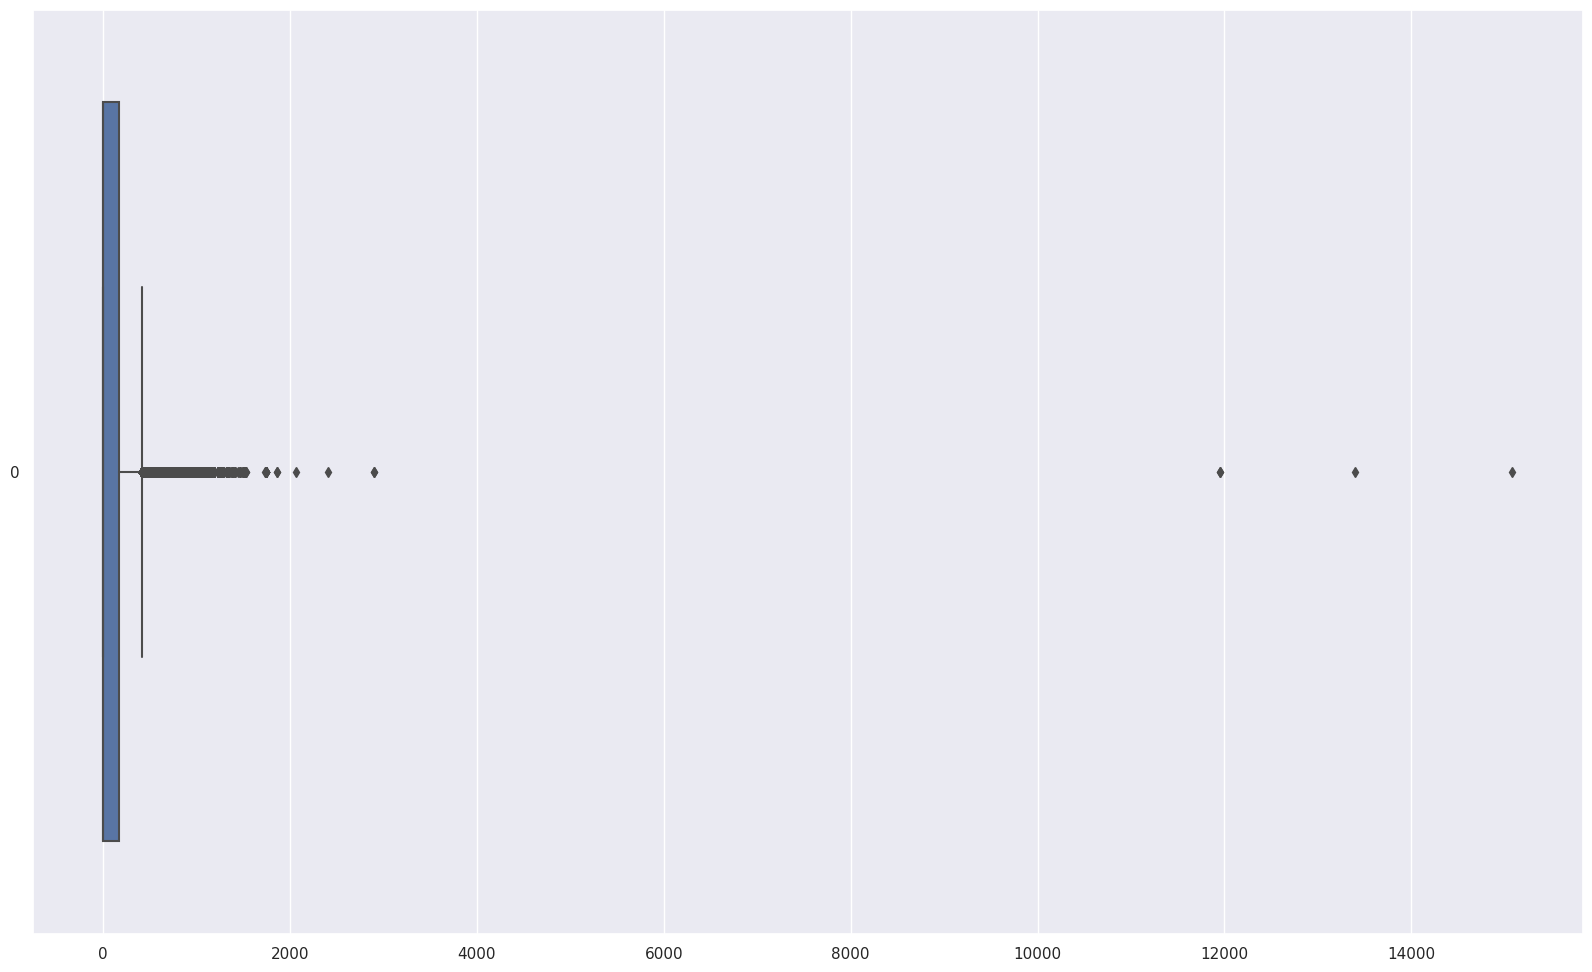

In [74]:
sns.boxplot(prices['netrate'],orient='h')

In [75]:
len(prices[prices['netrate'] == 0.00]), len(prices[prices['onsiterate'] == 0.00])

(101055, 4819)

In [76]:
len(prices[(prices['netrate']==0.00) & (prices['onsiterate']==0.00)])

4819

This can be used as training and predicting dataset

In [77]:
prices[(prices['netrate']==0.00) & (prices['onsiterate']==0.00)]

,id,refid,hotelcode,websitecode,dtcollected,ratedate,los,guests,roomtype,onsiterate,netrate,currency,ratedescription,ratetype,sourceurl,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
60,50697176,6903493,1198059,5,2019-10-12 15:46:27,2019-12-18,1,1,"Guest room, 2 Twin/Single Bed(s)",0.0,0.0,USD,NaN,NaN,https://www.agoda.com/en-gb/ac-hotel-mancheste...,NaN,2,N,Y,0.0,NaN,201,-1,NaN,0.0,media:M3diAproxy@107.158.217.18:80,N,NaN,Sold out,2019-10-13
77,50697844,6903493,1198059,5,2019-10-12 15:46:27,2019-12-18,1,1,"Guest room, Queen or Twin/Single Bed(s)",0.0,0.0,USD,NaN,NaN,https://www.agoda.com/en-gb/ac-hotel-mancheste...,NaN,2,N,Y,0.0,NaN,201,-1,NaN,0.0,media:M3diAproxy@107.158.217.18:80,N,NaN,Sold out,2019-10-13
134,50714442,7711934,6825,5,2019-10-12 15:46:41,2020-01-07,1,1,Triple Superior,0.0,0.0,USD,NaN,NaN,https://www.agoda.com/en-gb/timhotel-tour-eiff...,NaN,1,N,Y,0.0,NaN,201,-1,NaN,0.0,media:M3diAproxy@173.44.165.195:80,N,NaN,Sold out,2019-10-13
135,50714443,7711934,6825,5,2019-10-12 15:46:41,2020-01-07,1,1,Adjoining Rooms,0.0,0.0,USD,NaN,NaN,https://www.agoda.com/en-gb/timhotel-tour-eiff...,NaN,1,N,Y,0.0,NaN,201,-1,NaN,0.0,media:M3diAproxy@173.44.165.195:80,N,NaN,Sold out,2019-10-13
158,50719186,6924554,517461,5,2019-10-12 15:46:46,2019-12-18,1,1,Run of House,0.0,0.0,USD,NaN,NaN,https://www.agoda.com/en-gb/hotel-bucintoro/ho...,NaN,1,N,Y,0.0,NaN,201,-1,NaN,0.0,media:M3diAproxy@107.158.92.217:80,N,NaN,Sold out,2019-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165794,87489269,7868044,67730,5,2019-10-13 00:45:57,2019-10-13,1,1,Standard Triple Room,0.0,0.0,USD,NaN,NaN,https://www.agoda.com/en-gb/hotel-du-faisan/ho...,NaN,1,N,Y,0.0,NaN,201,-1,NaN,0.0,media:M3diAproxy@173.44.165.195:80,N,NaN,Sold out,2019-10-13
165795,87489270,7868044,67730,5,2019-10-13 00:45:57,2019-10-13,1,1,Standard Quad Bed,0.0,0.0,USD,NaN,NaN,https://www.agoda.com/en-gb/hotel-du-faisan/ho...,NaN,1,N,Y,0.0,NaN,201,-1,NaN,0.0,media:M3diAproxy@173.44.165.195:80,N,NaN,Sold out,2019-10-13
165797,87491639,8659254,98839,5,2019-10-13 00:45:59,2019-11-02,1,1,Classic Double or Twin,0.0,0.0,USD,NaN,NaN,https://www.agoda.com/en-gb/hotel-dock-suites-...,NaN,1,N,Y,0.0,NaN,201,-1,NaN,0.0,media:M3diAproxy@173.44.166.59:80,N,NaN,Sold out,2019-10-13
165798,87491640,8659254,98839,5,2019-10-13 00:45:59,2019-11-02,1,1,Junior Suite,0.0,0.0,USD,NaN,NaN,https://www.agoda.com/en-gb/hotel-dock-suites-...,NaN,1,N,Y,0.0,NaN,201,-1,NaN,0.0,media:M3diAproxy@173.44.166.59:80,N,NaN,Sold out,2019-10-13


In [78]:
prices['onsiterate'].mean(), prices['netrate'].mean()

(138.6648319497447, 96.02620197379923)

In [79]:
prices['onsiterate'].max(),prices['netrate'].max()

(18083.36, 15081.82)

In [80]:
prices['onsiterate'].min() , prices['onsiterate'].min()

(0.0, 0.0)

<Axes: xlabel='onsiterate', ylabel='Density'>

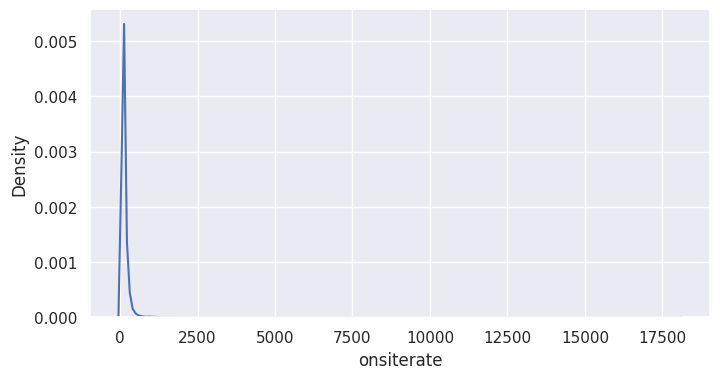

In [81]:
plt.figure(figsize=(8,4))
sns.kdeplot(prices['onsiterate'])

<Axes: xlabel='netrate', ylabel='Density'>

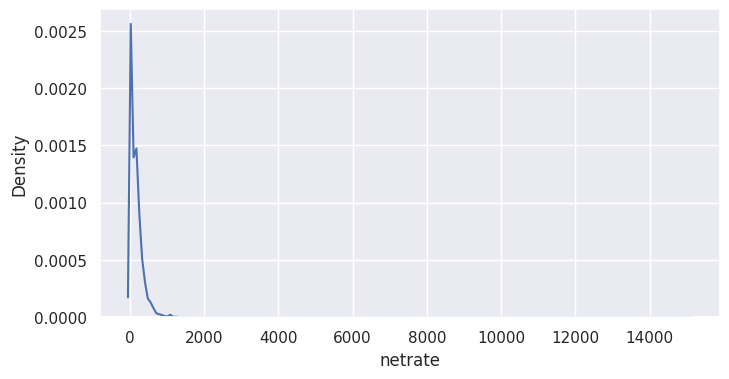

In [82]:
plt.figure(figsize=(8,4))
sns.kdeplot(prices['netrate'])

<Axes: xlabel='onsiterate', ylabel='Count'>

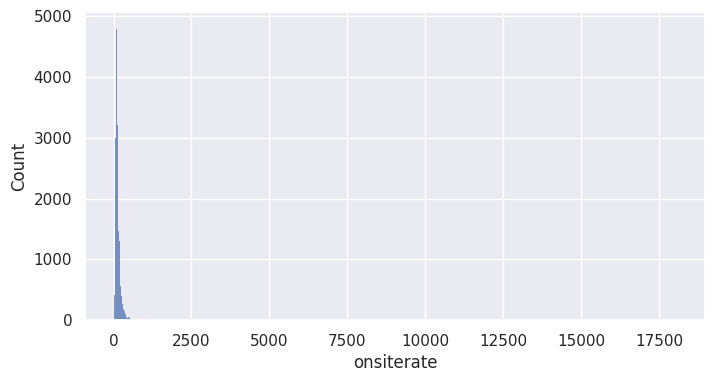

In [83]:
plt.figure(figsize=(8,4))
sns.histplot(prices['onsiterate'])

<Axes: xlabel='netrate', ylabel='Count'>

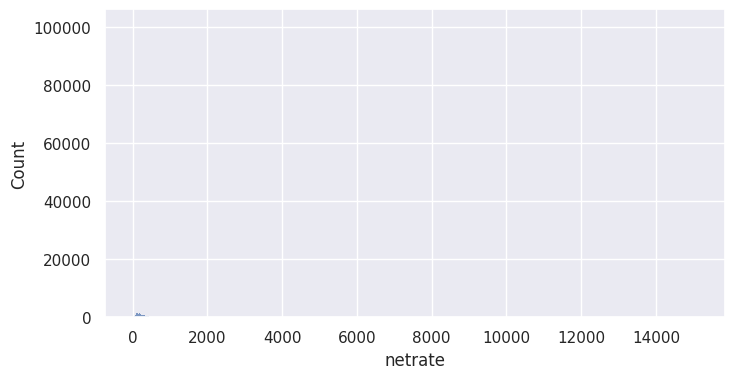

In [84]:
plt.figure(figsize=(8,4))
sns.histplot(prices['netrate'])

In [85]:
prices['onsiterate'].skew(), prices['netrate'].skew()

(39.693393305748884, 12.85382760068159)

Conclusion: currency can be dropped, USD and EUR are all same in currency exchange

In [86]:
prices['currency'].value_counts()

USD    165873
Name: currency, dtype: int64

In [87]:
prices.head()

,id,refid,hotelcode,websitecode,dtcollected,ratedate,los,guests,roomtype,onsiterate,netrate,currency,ratedescription,ratetype,sourceurl,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,8646773,634876,5,2019-10-12 15:46:54,2019-11-02,1,1,Double Room,82.36,87.84,USD,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,https://www.agoda.com/en-gb/the-old-cider-hous...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,6.24,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.165.126:80,Y,Free Breakfast,NaN,2019-10-13
1,50672149,6234691,8328096,5,2019-10-12 15:47:45,2019-11-30,1,1,Vacation Home,636.09,0.00,USD,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,https://www.agoda.com/en-gb/pantlleni/hotel/be...,Air conditioning: ;Closet: ;Fireplace: ;Free W...,4,N,N,0.00,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.164.126:80,Y,NaN,NaN,2019-10-13
2,50643430,7015677,8323442,5,2019-10-12 15:47:00,2019-12-20,1,1,Vacation Home,591.74,0.00,USD,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),https://www.agoda.com/en-gb/willow-cottage/hot...,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,4,N,N,0.00,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.166.122:80,Y,NaN,NaN,2019-10-13
3,50650317,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,881.48,0.00,USD,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),https://www.agoda.com/en-gb/apollo-hotel-londo...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,1,N,N,0.00,NaN,200,2,Tax 20%,0.0,media:M3diAproxy@209.242.219.141:80,Y,NaN,NaN,2019-10-13
4,50650318,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,897.53,0.00,USD,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),https://www.agoda.com/en-gb/apollo-hotel-londo...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,3,N,N,0.00,NaN,200,2,VAT $ 179.51,0.0,media:M3diAproxy@209.242.219.141:80,Y,Free breakfast for {3},NaN,2019-10-13


Conclusion: ratetype can be merged into 4 categories as they are date specific

In [88]:
prices['ratetype'].value_counts().head(5)

Extra low price! (non-refundable)                      51483
FREE cancellation, Pay at the hotel                    11544
Cancellation policy                                     7901
Extra low price! (non-refundable), Pay at the hotel     1422
Free cancellation before November 25, 2019               724
Name: ratetype, dtype: int64

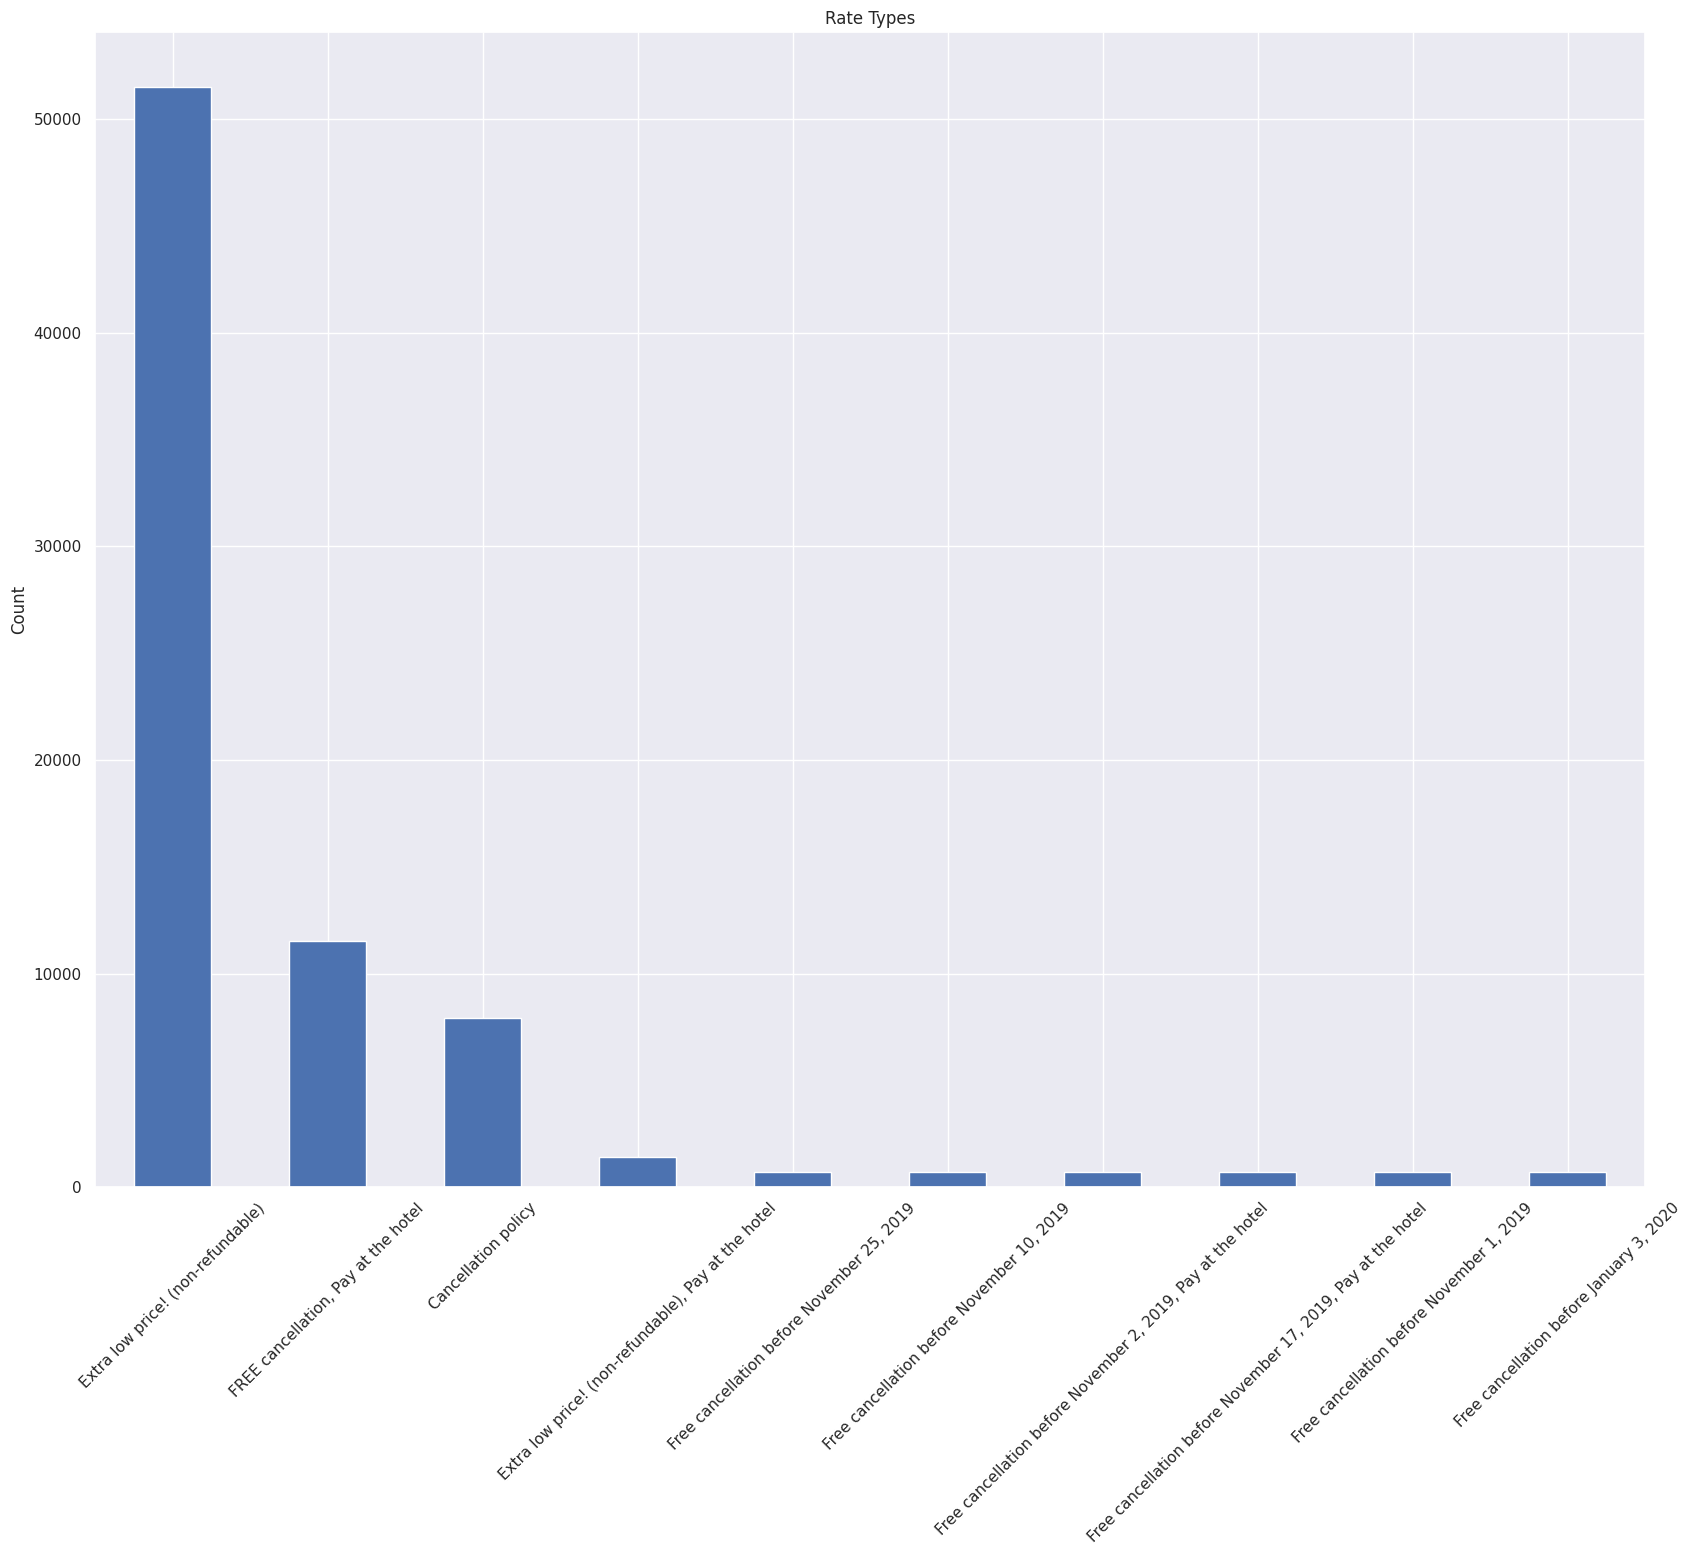

In [89]:
plt.figure(figsize=(20,15))
prices['ratetype'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Rate Types')
plt.ylabel('Count')
plt.show()

Conclusion: Max 2 values dominate the chart ie 0 dollors discount given and 75 dollors discount given

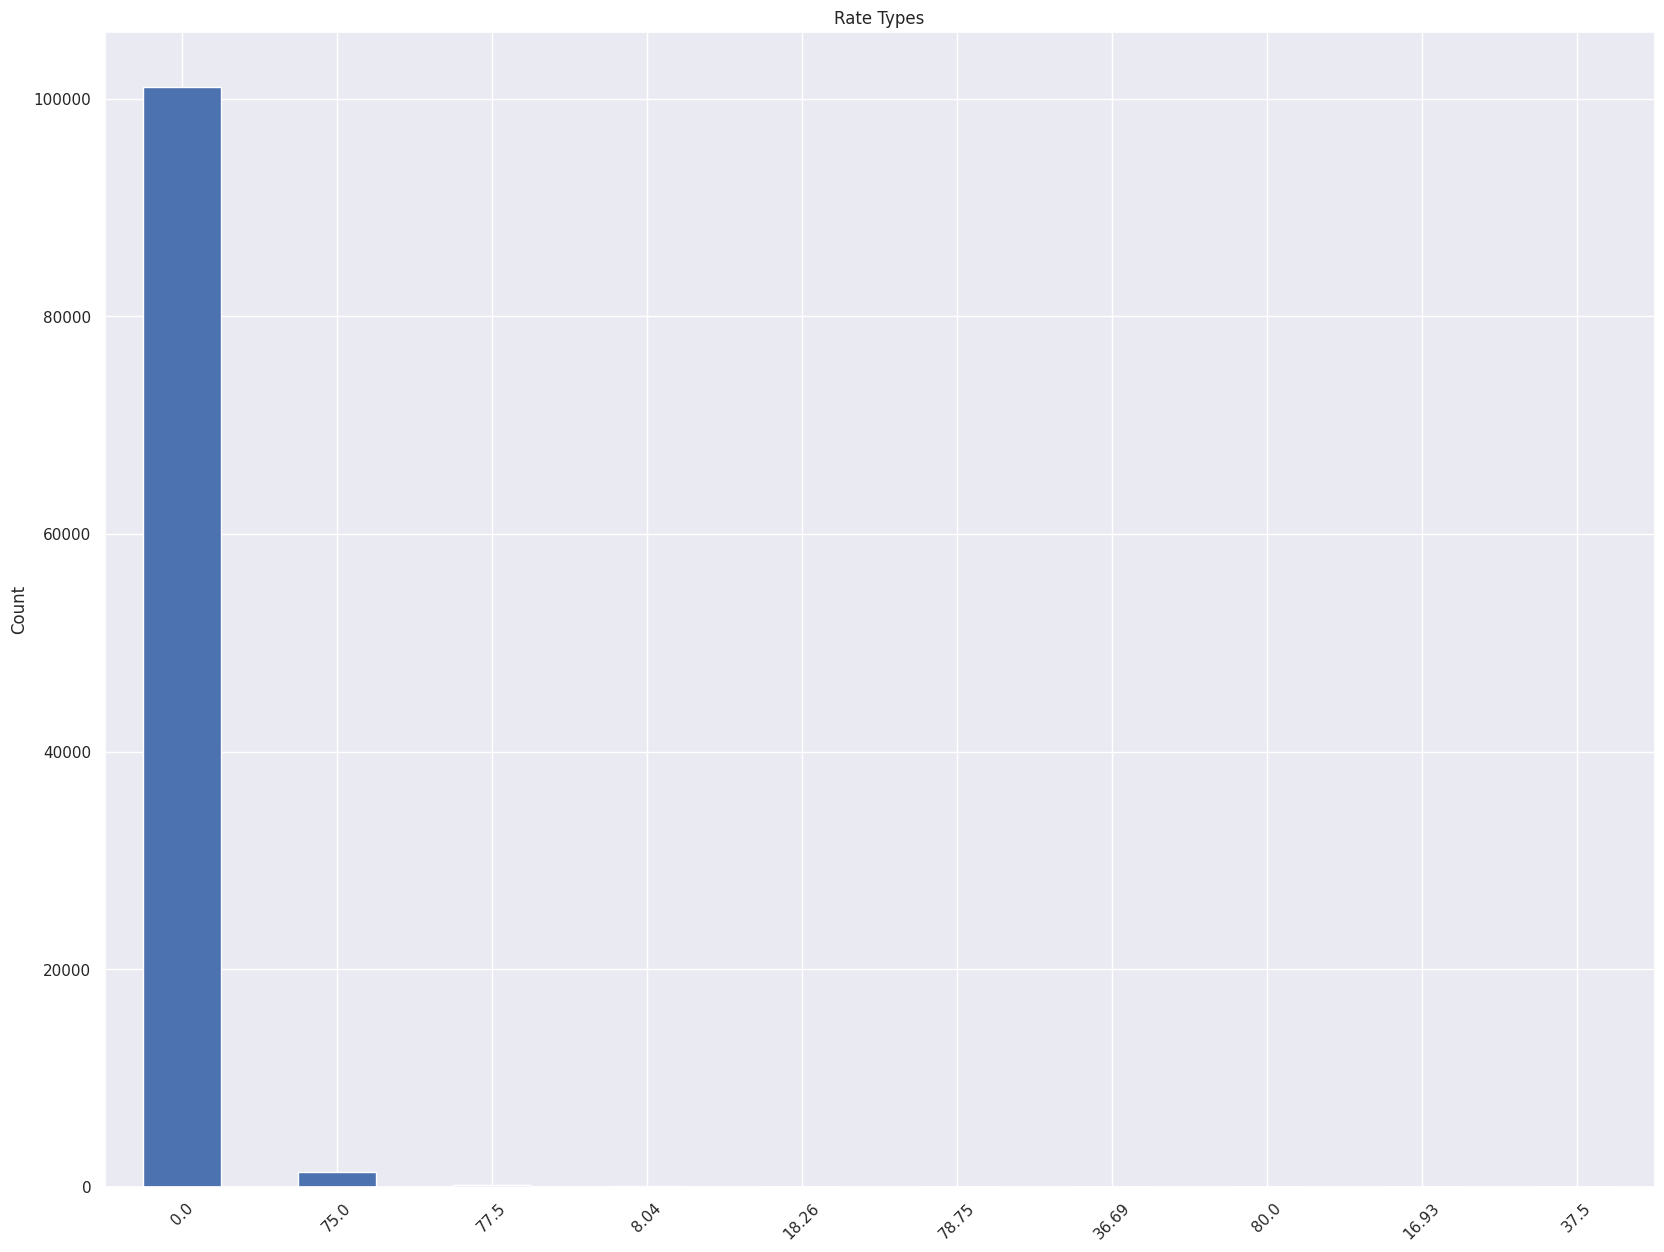

In [90]:
plt.figure(figsize=(20,15))
prices['discount'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Rate Types')
plt.ylabel('Count')
plt.show()


In [91]:
#Bivariate Analysis

prices.head()

,id,refid,hotelcode,websitecode,dtcollected,ratedate,los,guests,roomtype,onsiterate,netrate,currency,ratedescription,ratetype,sourceurl,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,8646773,634876,5,2019-10-12 15:46:54,2019-11-02,1,1,Double Room,82.36,87.84,USD,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,https://www.agoda.com/en-gb/the-old-cider-hous...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,6.24,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.165.126:80,Y,Free Breakfast,NaN,2019-10-13
1,50672149,6234691,8328096,5,2019-10-12 15:47:45,2019-11-30,1,1,Vacation Home,636.09,0.00,USD,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,https://www.agoda.com/en-gb/pantlleni/hotel/be...,Air conditioning: ;Closet: ;Fireplace: ;Free W...,4,N,N,0.00,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.164.126:80,Y,NaN,NaN,2019-10-13
2,50643430,7015677,8323442,5,2019-10-12 15:47:00,2019-12-20,1,1,Vacation Home,591.74,0.00,USD,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),https://www.agoda.com/en-gb/willow-cottage/hot...,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,4,N,N,0.00,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.166.122:80,Y,NaN,NaN,2019-10-13
3,50650317,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,881.48,0.00,USD,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),https://www.agoda.com/en-gb/apollo-hotel-londo...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,1,N,N,0.00,NaN,200,2,Tax 20%,0.0,media:M3diAproxy@209.242.219.141:80,Y,NaN,NaN,2019-10-13
4,50650318,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,897.53,0.00,USD,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),https://www.agoda.com/en-gb/apollo-hotel-londo...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,3,N,N,0.00,NaN,200,2,VAT $ 179.51,0.0,media:M3diAproxy@209.242.219.141:80,Y,Free breakfast for {3},NaN,2019-10-13


Conclusion: Double Room and Twin Room could be same with different names in different hotels

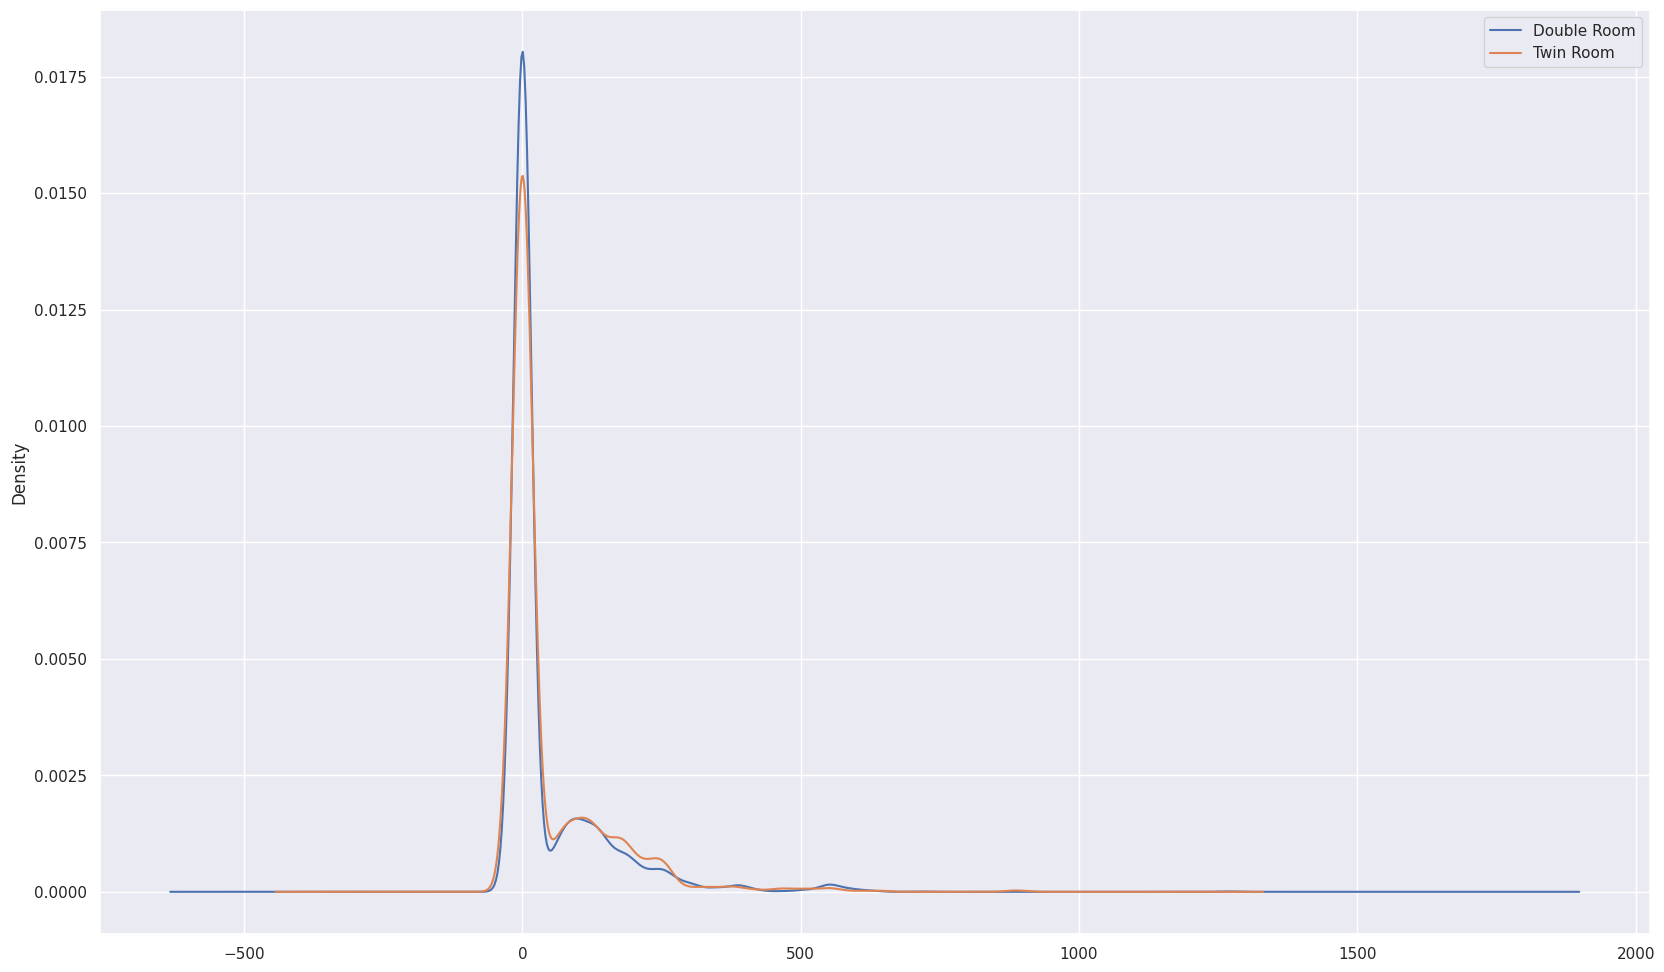

In [92]:
prices[prices['roomtype'] == 'Double Room']['netrate'].plot(kind='kde',label='Double Room')
prices[prices['roomtype'] == 'Twin Room']['netrate'].plot(kind='kde',label='Twin Room')
plt.legend()
plt.show()

<ipython-input-93-c2500c871a6e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(prices.corr())


<Axes: >

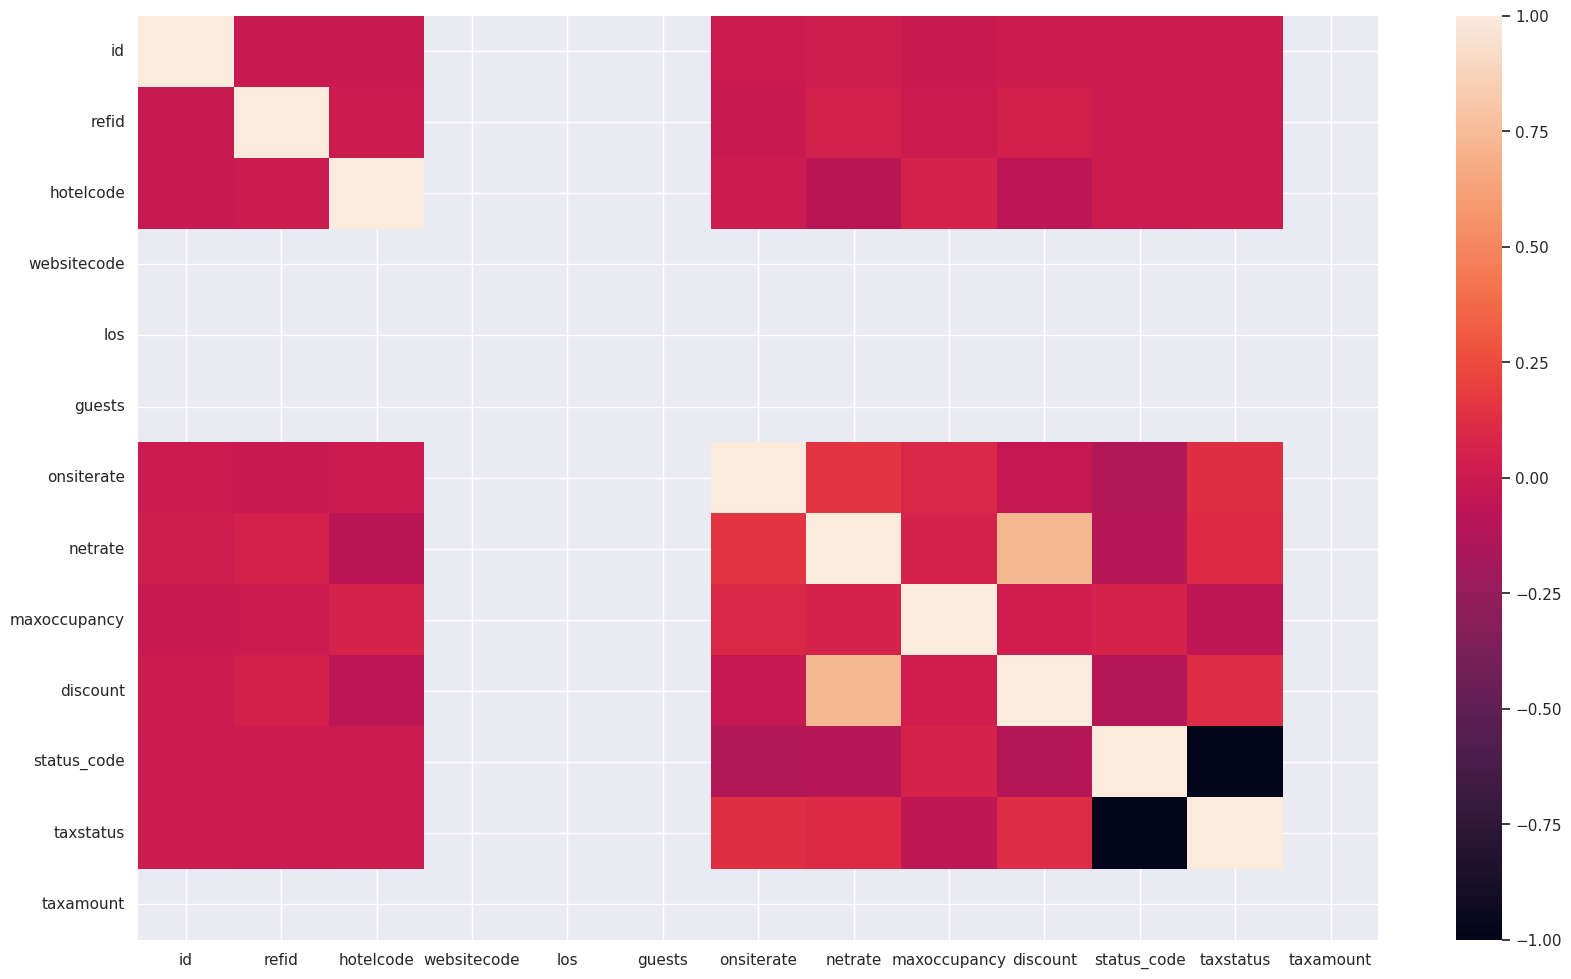

In [93]:
sns.heatmap(prices.corr())

In [94]:
details.head()

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


In [95]:
attr.head()

,id,hotelcode,roomamenities,roomtype,ratedescription
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed"
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"


In [96]:
prices.head()

,id,refid,hotelcode,websitecode,dtcollected,ratedate,los,guests,roomtype,onsiterate,netrate,currency,ratedescription,ratetype,sourceurl,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,8646773,634876,5,2019-10-12 15:46:54,2019-11-02,1,1,Double Room,82.36,87.84,USD,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,https://www.agoda.com/en-gb/the-old-cider-hous...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,6.24,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.165.126:80,Y,Free Breakfast,NaN,2019-10-13
1,50672149,6234691,8328096,5,2019-10-12 15:47:45,2019-11-30,1,1,Vacation Home,636.09,0.00,USD,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,https://www.agoda.com/en-gb/pantlleni/hotel/be...,Air conditioning: ;Closet: ;Fireplace: ;Free W...,4,N,N,0.00,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.164.126:80,Y,NaN,NaN,2019-10-13
2,50643430,7015677,8323442,5,2019-10-12 15:47:00,2019-12-20,1,1,Vacation Home,591.74,0.00,USD,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),https://www.agoda.com/en-gb/willow-cottage/hot...,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,4,N,N,0.00,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.166.122:80,Y,NaN,NaN,2019-10-13
3,50650317,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,881.48,0.00,USD,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),https://www.agoda.com/en-gb/apollo-hotel-londo...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,1,N,N,0.00,NaN,200,2,Tax 20%,0.0,media:M3diAproxy@209.242.219.141:80,Y,NaN,NaN,2019-10-13
4,50650318,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,897.53,0.00,USD,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),https://www.agoda.com/en-gb/apollo-hotel-londo...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,3,N,N,0.00,NaN,200,2,VAT $ 179.51,0.0,media:M3diAproxy@209.242.219.141:80,Y,Free breakfast for {3},NaN,2019-10-13


In [97]:
#Feature Engg Begins

In [98]:
a = pd.merge(attr,details,left_on='hotelcode',right_on='hotelid',how='outer')
a.sample(5)

,id_x,hotelcode,roomamenities,roomtype,ratedescription,id_y,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
194390,NaN,NaN,NaN,NaN,NaN,60399,79992,My Place,Lippmannstr. 5,Hamburg,Germany,22769.0,Hotels,3,53.559906,9.961966,2,http://www.booking.com/hotel/de/my-place.en-gb...,EUR
60415,69527816.0,250126.0,Additional bathroom: ;Air conditioning: ;Carpe...,Triple Room,"Room size: 38 m²/409 ft², Shower and bathtub, ...",75978,250126,Blues Hotel,Wolnosci 15,Chorzow,Poland,NaN,Hotels,3,50.297169,18.951241,5,https://www.agoda.com/en-gb/blues-hotel/hotel/...,EUR
254852,NaN,NaN,NaN,NaN,NaN,125907,5864568,Six-Bedroom Holiday Home in Miami Platja,NaN,Miami Platja,Spain,43892.0,Hotels,3,41.016201,0.938490,5,https://www.agoda.com/en-gb/six-bedroom-holida...,EUR
208097,NaN,NaN,NaN,NaN,NaN,75435,89449,Best Western Grand Hotel Guinigi,Via Romana 1247,Lucca,Italy,55100.0,Hotels,4,43.844864,10.533240,2,http://www.booking.com/hotel/it/grand-guinigi....,EUR
251010,NaN,NaN,NaN,NaN,NaN,121501,1098321,Resort David,"Str. Peste Vale, Nr. 138 (punct Ruget)",Rucar,Romania,117630.0,Resorts,4,45.384644,25.181594,5,https://www.agoda.com/resort-david/hotel/rucar...,EUR


In [99]:
b = pd.merge(attr,details,left_on='hotelcode',right_on='hotelid',how='inner')
b.sample(5)

,id_x,hotelcode,roomamenities,roomtype,ratedescription,id_y,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
42564,64914639,154746,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,2 Single Beds Non-smoking,"Room size: 17 m²/183 ft², Non-smoking, Shower,...",143513,154746,Holiday Inn Express Foligno,16 Massimo Arcamone Street,Foligno,Italy,6034.0,Hotels,3,42.960018,12.690298,5,https://www.agoda.com/en-gb/holiday-inn-expres...,EUR
76630,76645302,930829,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Single Room,"Non-smoking, Shower and bathtub, 1 single bed",80003,930829,Atherstone Red Lion Hotel,Long Street,Atherstone,United Kingdom,NaN,Hotels,3,52.577312,-1.547206,5,https://www.agoda.com/en-gb/atherstone-red-lio...,GBP
72945,74343188,2062,Air conditioning: ;Bathrobes: ;Closet: ;Clothe...,Superior Room XL,"Room size: 30 m²/323 ft², Street view, Shower,...",59242,2062,Nh Atlanta Rotterdam Hotel,"Coolsingel/Aert Van Nesstraat, 4",Rotterdam,Netherlands,1000.0,Hotels,4,51.921158,4.479106,5,https://www.agoda.com/en-gb/nh-atlanta-rotterd...,EUR
44875,65214617,620103,Air conditioning: ;Closet: ;Desk: ;Free Wi-Fi ...,Standard Family Room (3 people),"Room size: 16 m²/172 ft², Shower, 1 single bed...",133342,620103,Botany Bay Hotel,"Marine Drive, Kingsgate, Broadstairs",Thanet,United Kingdom,NaN,Hotels,3,51.387669,1.436890,5,https://www.agoda.com/en-gb/botany-bay-hotel/h...,GBP
81453,72207442,159628,Air conditioning: ;Carpeting: ;Closet: ;Clothe...,Superior Golf View Room,"Room size: 24 m²/258 ft², Non-smoking, Shower ...",146060,159628,Carnoustie Golf Hotel and Spa,Links Parade,Carnoustie,United Kingdom,NaN,Hotels,4,56.497541,-2.716069,5,https://www.agoda.com/en-gb/carnoustie-golf-ho...,GBP


In [100]:
final_df = pd.merge(b,prices,left_on='hotelid',right_on='hotelcode',how='inner')

In [101]:
final_df.sample(2)

,id_x,hotelcode_x,roomamenities_x,roomtype_x,ratedescription_x,id_y,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr,id,refid,hotelcode_y,websitecode,dtcollected,ratedate,los,guests,roomtype_y,onsiterate,netrate,currency,ratedescription_y,ratetype,sourceurl,roomamenities_y,maxoccupancy,ispromo,closed,discount,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
8272335,74440861,4943606,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Standard Room with 1 King Bed Non Smoking,"Free Wi-Fi, Free cancellation before October 1...",113573,4943606,Les Violettes Hotel & SPA AlsaceBW Premier Col...,Thierenbach,Jungholtz,France,68500.0,Hotels,4,47.878888,7.190000,5,https://www.agoda.com/en-gb/les-violettes-hote...,EUR,74439151,7900520,4943606,5,2019-10-12 21:41:57,2019-10-14,1,1,Double Queen Size Bed,140.66,0.00,USD,"Free Wi-Fi, Cancellation policy",Cancellation policy,https://www.agoda.com/en-gb/les-violettes-hote...,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,1,N,N,0.00,NaN,200,2,Tax 10%,0.0,media:M3diAproxy@191.96.242.115:80,Y,NaN,NaN,2019-10-13
8376464,74429625,79136,Air conditioning: ;Alarm clock: ;Bathrobes: ;C...,King Hilton Suite,"Room size: 47 m²/506 ft², Non-smoking, Shower ...",60150,79136,Hilton Leicester Hotel,"21 Junction Approach, Leicester",Blaby,United Kingdom,NaN,Hotels,3,52.600620,-1.184077,5,https://www.agoda.com/en-gb/hilton-leicester-h...,GBP,74427705,6584733,79136,5,2019-10-12 21:41:49,2019-12-09,1,1,Business Double,145.40,240.14,USD,"Room size: 28 m²/301 ft², City view, Non-smoki...",Extra low price! (non-refundable),https://www.agoda.com/en-gb/hilton-leicester-h...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,2,Y,N,39.45,NaN,200,2,Tax 20%,0.0,media:M3diAproxy@107.173.209.80:80,Y,Free breakfast for {2},NaN,2019-10-13


In [102]:
final_df['hotelblock'].value_counts()

Sold out    215972
Name: hotelblock, dtype: int64

In [103]:
#Data Cleaning
#Removing Column that are not needed
col_del = ['id_x','hotelcode_x','id_y','zipcode','url','id','refid','hotelcode_y','currency','sourceurl','status_code','taxstatus','taxamount','proxyused','hotelblock','roomamenities_y']
df = final_df.drop(col_del,axis=1)

In [ ]:
df.to_csv('hotel.csv')